<table style="width: 100%; background-color: #4e79a7; border: 3px solid white; border-radius: 10px; border-collapse: collapse; overflow: hidden; box-shadow: 0 4px 15px rgba(0,0,0,0.15);">
    <tr>
        <td style="padding: 30px; text-align: center; vertical-align: middle;">
            <h1 style="font-size: 34px; font-weight: bold; color: white; margin: 0; font-family: sans-serif;">
                Body signal of smoking Analysis & Prediction
            </h1>
            <p style="font-size: 30px; font-weight: normal; color: white; margin-top: 15px; font-family: sans-serif; opacity: 0.9;">
                Author: Jerónimo Hoyos Botero<br>
                Last updated: January 2026
            </p>
        </td>
        <td style="width: 250px; padding: 20px; text-align: center; vertical-align: middle;">
            <img src="https://img.freepik.com/premium-vector/lungs-nicotine-smoke-world-no-tobacco-day-doodle_665042-328.jpg?w=360" 
                 style="width: 180px; 
                        height: 180px; 
                        object-fit: cover; 
                        border-radius: 50%; 
                        border: 4px solid white; 
                        box-shadow: 0 4px 10px rgba(0,0,0,0.2);">
        </td>
    </tr>
</table>

**Summary**

This project aims to analyze and develop a machine learning model using the *Body Signals of Smoking* dataset from Kaggle. The main objective is to perform meaningful data analytics to study the disadvantages of smoking and to predict whether an individual is a smoker based on physiological body signals.

**Problem**

Smoking is the act of inhaling and exhaling the smoke produced by burning tobacco. Tobacco smoke contains thousands of harmful chemicals, many of which are toxic and addictive. Smoking affects nearly every organ in the human body and is one of the leading causes of preventable diseases and deaths worldwide.

People who smoke are at a significantly higher risk of developing serious health problems, including heart disease, stroke, respiratory illnesses, and various types of cancer. Although quitting smoking can be challenging, stopping at any age greatly reduces health risks. Over time, the body begins to heal, improving lung function, circulation, and overall quality of life.

**Objectives**

* Perform exploratory data analysis to identify physiological patterns associated with smoking habits.
* Develop a machine learning classification model to predict whether an individual is a smoker based on body signal measurements.
* Compare multiple classification models (e.g., Logistic Regression, Random Forest, XGBoost) using appropriate evaluation metrics such as accuracy, F1-score, and AUC.
* Identify the most influential physiological features related to smoking through feature importance analysis.

**Value Proposition**

This project provides data-driven insights into the physiological effects of smoking and demonstrates how machine learning can be used to identify smoking behavior from health-related signals. The results may support public health research, preventive healthcare strategies, and awareness initiatives by highlighting measurable indicators associated with smoking.

**Business / Social Impact Goals**

* Support early identification of smoking-related health risks using non-invasive physiological data.
* Provide a reproducible machine learning pipeline that can be extended to other lifestyle-related health studies.
* Contribute to data-informed decision-making in public health and preventive medicine initiatives.
* Raise awareness about the measurable physiological disadvantages of smoking through interpretable analytics.


<br>

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;text-align: center">
    <h2 style="margin:0px">
    Table of Contents
    </h2>
</div>
<br>

<div align="center">

| No | Contents | No | Contents |
|:---| :--- |:---| :---- |
| 1 | [Importing Libraries](#1) | 6 | [Exploratory Data Analysis (EDA)](#6) |
| 2 | [Data Loading and Inspection](#2) | 7 | [Dimensionality Reduction](#7) |
| 3 | [Data Cleaning](#3) | 8 | [Preprocessing For Classification](#8) |
| 4 | [Data Overview Table](#4) | 9 | [Classification Models](#9) |
| 5 | [Settings](#5) | 10 | [Conclusions & Closing](#10) |

</div>

<p style="padding:15px; border-width:3px; border-color:#4e79a7; border-style:solid; border-radius:6px;text-align: center"> 
The dataset was shared by following link: 
    <a href="https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/data" style="color: #ffffff; font-weight: bold; text-decoration: underline;">[Click here to view dataset]</a>
</p>






<a id="1"></a>

<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Importing Libraries
    </h1>
</div>

In [71]:
# Standard library
import time
import math

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import ttest_ind

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")

# To show all columns
pd.set_option('display.max_columns', 15)

<a id="2"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">Data Loading and Inspection</h1>
</div>

In [72]:
data = pd.read_csv("data/smoking.csv")
df = data.copy()

In [73]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 27)
Glimpse of The Dataset :


In [74]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HD

<a id="3"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Data Cleaning
    </h1>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Standardizing Names and Labels
    </h4>
</div> 


In [75]:
df = df.copy(deep=True)

df.rename(columns = {
"height(cm)" : "height_cm", 
"weight(kg)" : "weight_kg",
"waist(cm)" : "waist_cm", 
"eyesight(left)" : "eyesight_left",
"eyesight(right)" : "eyesight_right", 
"hearing(left)" : "hearing_left",
"hearing(right)" : "hearing_right", 
"fasting blood sugar" : "fasting_blood_sugar",
"Cholesterol" : "cholesterol", 
"HDL" : "hdl", 
"LDL" : "ldl",
"Urine protein" : "urine_protein",
"serum creatinine" : "serum_creatinine",
"AST" : "ast", 
"ALT" : "alt", 
"Gtp" : "gtp", 
"dental caries" : "dental_caries"},
inplace = True)

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Descritive Overview
    </h4>
</div> 


In [76]:
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height_cm            55692 non-null  int64  
 4   weight_kg            55692 non-null  int64  
 5   waist_cm             55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hd

In [84]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

In [77]:
df.describe(include = object).T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Null Values
    </h4>
</div> 

In [78]:
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a979b9a9d8f","color":"white","border": "1.5px  solid black"})

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Duplicates
    </h4>
</div> 

In [79]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {df.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {df.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 55692 entries in this dataset.

After removing duplicate entries there are 55692 entries in this dataset.


In [80]:
df["gender"] = df["gender"].replace({"M" : "Male" , "F" : "Female"})
df["dental_caries"] = df["dental_caries"].replace({1 : "Yes" , 0 : "No"})
df["tartar"] = df["tartar"].replace({"Y" : "Yes" , "N" : "No"})
df["smoking"] = df["smoking"].replace({1 : "Yes" , 0 : "No"})

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Engineering New Features
    </h4>
</div> 

In [81]:
counts_sdo = df["ID"].value_counts()
print(counts_sdo[counts_sdo > 1])

Series([], Name: count, dtype: int64)


In [ ]:
df["bmi"] = df["weight_kg"]/((df["height_cm"]/100)**2) 
df["avg_eyesight"] = (df["eyesight_left"]+df["eyesight_right"])/2 
df["hdl_to_ldl"] = df["hdl"]/df["ldl"] 

df = df.drop(["ID","weight_kg","height_cm","eyesight_left","eyesight_right","hearing_right","hearing_left","hdl","ldl","oral"], axis = 1)

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Data Types
    </h4>
</div> 

In [ ]:
print(df.dtypes)

gender                  object
age                      int64
waist_cm               float64
systolic               float64
relaxation             float64
fasting_blood_sugar    float64
cholesterol            float64
triglyceride           float64
hemoglobin             float64
urine_protein          float64
serum_creatinine       float64
ast                    float64
alt                    float64
gtp                    float64
dental_caries           object
tartar                  object
smoking                 object
bmi                    float64
avg_eyesight           float64
hdl_to_ldl             float64
dtype: object


In [83]:
df["systolic"] = df["systolic"].astype(int)
df["relaxation"] = df["relaxation"].astype(int)
df["fasting_blood_sugar"] = df["fasting_blood_sugar"].astype(int)
df["cholesterol"] = df["cholesterol"].astype(int)
df["triglyceride"] = df["triglyceride"].astype(int)
df["urine_protein"] = df["urine_protein"].astype(int)
df["ast"] = df["ast"].astype(int)
df["alt"] = df["alt"].astype(int)
df["gtp"] = df["gtp"].astype(int)

<a id="4"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Data Overview Table
    </h1>
</div> 

<br>

<div align="center">

| Column              | Description                        | Storage Type | Semantic Type         | Theoretical Range  | Observed Range     |
| :------------------ | :--------------------------------- | :----------- | :-------------------- | :----------------- | :----------------- |
| smoking             | Smoking status                     | String       | Categorical (Binary)  | ["Yes", "No"]      | ["Yes", "No"]      |
| gender              | Biological sex                     | String       | Categorical (Nominal) | ["Male", "Female"] | ["Male", "Female"] |
| age                 | Age (in years)                     | Integer      | Numerical             | [0, 120]           | [20, 85]           |
| bmi                 | Body mass index = weight / height² | Float        | Numerical             | [10, 60]           | [14, 42]           |
| waist               | Waist circumference (cm)           | Float        | Numerical             | [30, 200]          | [51, 129]          |
| avg_eyesight        | Average eyesight (Diopters)        | Float        | Numerical             | [0, 10]            | [0.1, 9.9]         |
| systolic            | Systolic blood pressure (mmHg)     | Integer      | Numerical             | [70, 250]          | [71, 240]          |
| relaxation          | Diastolic blood pressure (mmHg)    | Integer      | Numerical             | [40, 150]          | [40, 146]          |
| fasting_blood_sugar | Fasting blood sugar (mg/dL)        | Integer      | Numerical             | [40, 600]          | [46, 505]          |
| cholesterol         | Total cholesterol (mg/dL)          | Integer      | Numerical             | [50, 600]          | [55, 556]          |
| triglyceride        | Triglycerides (mg/dL)              | Integer      | Numerical             | [10, 1000]         | [8, 999]           |
| HDL to LDL          | HDL / LDL cholesterol ratio        | Float        | Numerical             | [0.1, 50]          | [0.01, 49]         |
| hemoglobin          | Hemoglobin level (g/dL)            | Float        | Numerical             | [5, 25]            | [4.9, 21.1]        |
| urine_protein       | Urine protein level                | Integer      | Numerical             | [0, 6]             | [1, 6]             |
| serum_creatinine    | Kidney function indicator (mg/dL)  | Float        | Numerical             | [0.1, 15]          | [0.1, 11.6]        |
| ast                 | Aspartate aminotransferase (U/L)   | Integer      | Numerical             | [5, 2000]          | [6, 1311]          |
| alt                 | Alanine aminotransferase (U/L)     | Integer      | Numerical             | [5, 3000]          | [1, 2914]          |
| gtp                 | Gamma-glutamyl transferase (U/L)   | Integer      | Numerical             | [1, 1000]          | [1, 999]           |
| dental_caries       | Presence of dental caries          | String       | Categorical (Binary)  | ["Yes", "No"]      | ["Yes", "No"]      |
| tartar              | Presence of dental tartar          | String       | Categorical (Binary)  | ["Yes", "No"]      | ["Yes", "No"]      |





<a id="5"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Settings
    </h1>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Color Palette
    </h4>
</div> 

In [85]:
colors_palette = {
    "coral": "#e15759",
    "steel_blue": "#4e79a7",
    "orange": "#f28e2b",
    "muted_teal": "#76b7b2",
    "sage_green": "#59a14f"
}


<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    List of Columns Types
    </h4>
</div> 

In [86]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_columns = df.select_dtypes(include="object").columns.tolist()

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Creating Functions
    </h4>
</div> 

In [87]:
def remove_outliers_iqr(df, numeric_cols):
    """
    Removes outliers from a DataFrame using the IQR method for the specified
    numeric columns.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    numeric_cols : list of str
        List of numeric column names on which to apply IQR-based filtering.

    Returns
    -------
    pandas.DataFrame
        DataFrame with outliers removed.
    """
    df_clean = df.copy()

    for col in numeric_cols:
        if col not in df_clean.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower) &
            (df_clean[col] <= upper)
        ]

    print("Original shape:", df.shape)
    print("Without outliers:", df_clean.shape)

    return df_clean


In [88]:
def plot_histogram(columns, df, bins = 20, color = colors_palette["steel_blue"]):
    """
    Plots histograms with mean lines for multiple numerical columns.

    Parameters
    ----------
    columns : list of str
        List of column names to plot.
    df : pandas.DataFrame
        DataFrame containing the data.
    bins : int, optional
        Number of histogram bins (default is 20).
    color : str, optional
        Color for the histograms (default is a blue tone).
    """
    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten() if n_vars > 1 else [axs]

    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

        ax = axs[i]
        data = df[col].dropna()

        if data.empty:
            ax.set_title(f"{col} (no data)")
            continue

        mean_val = data.mean()

        ax.hist(
            data,
            bins=bins,
            alpha=0.7,
            edgecolor="white",
            color=color
        )

        ax.axvline(
            mean_val,
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.legend()

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

In [89]:
def plot_boxplot(columns, df, color = colors_palette["steel_blue"]):
    """
    Plots boxplots with mean lines for multiple numerical columns.

    Parameters
    ----------
    columns : list of str
        List of column names to plot.
    df : pandas.DataFrame
        DataFrame containing the data.
    color : str, optional
        Color for the boxplots (default is a blue tone).
    """
    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten() if n_vars > 1 else [axs]

    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

        ax = axs[i]
        data = df[col].dropna()

        if data.empty:
            ax.set_title(f"{col} (no data)")
            continue

        mean_val = data.mean()

        ax.boxplot(
            data,
            vert=True,
            widths=0.5,
            patch_artist=True,
            boxprops=dict(facecolor=color, edgecolor="white"),
            medianprops=dict(color="black", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(
                marker="o",
                markersize=4,
                markerfacecolor="gray",
                alpha=0.6
            )
        )

        ax.axhline(
            mean_val,
            linestyle="--",
            linewidth=2,
            label=f"Mean: {mean_val:.2f}"
        )

        ax.set_title(col, fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel(col)
        ax.legend()

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()

In [90]:
def plot_binary_pie_charts(columns, df, colors=None):
    """
    Plots donut-style pie charts for binary categorical variables.

    Parameters
    ----------
    columns : list of str
        List of binary categorical column names.
    df : pandas.DataFrame
        DataFrame containing the data.
    colors : list of str, optional
        List of two colors to use for the pie charts.
    """
    if colors is None:
        colors = [
            colors_palette["steel_blue"],
            colors_palette["coral"]
        ]

    n_vars = len(columns)
    n_cols = 2
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten() if n_vars > 1 else [axs]

    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

        ax = axs[i]

        counts = df[col].value_counts(dropna=True)

        if len(counts) != 2:
            raise ValueError(f"Column '{col}' is not binary.")

        labels = counts.index.astype(str)
        values = counts.values

        wedges, _, _ = ax.pie(
            values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=90,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(size=14, color="white"),
            wedgeprops=dict(
                width=0.45,
                edgecolor="white",
                linewidth=4
            )
        )

        ax.set_title(col, fontsize=18)
        ax.legend(
            wedges,
            labels,
            title="Class",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [91]:
def plot_comparison_histogram_style(
    columns,
    group0, label0,
    group1, label1,
    bins=20,
    colors=None
):
    """
    Plots overlaid histograms comparing two groups for multiple numerical variables.

    Parameters
    ----------
    columns : list of str
        List of numerical column names.
    group0 : pandas.DataFrame
        DataFrame for group 0 (e.g., non-smokers).
    label0 : str
        Label for group 0.
    group1 : pandas.DataFrame
        DataFrame for group 1 (e.g., smokers).
    label1 : str
        Label for group 1.
    bins : int, optional
        Number of histogram bins (default is 20).
    colors : list of str, optional
        Two colors for the histograms.
    """
    if colors is None:
        colors = [
            colors_palette["steel_blue"],
            colors_palette["coral"]
        ]

    n_vars = len(columns)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axs = axs.flatten() if n_vars > 1 else [axs]

    plt.tight_layout(pad=4.0)

    for i, col in enumerate(columns):
        if col not in group0.columns or col not in group1.columns:
            raise ValueError(f"Column '{col}' not found in both DataFrames.")

        ax = axs[i]

        data_0 = group0[col].dropna()
        data_1 = group1[col].dropna()

        if data_0.empty or data_1.empty:
            ax.set_title(f"{col} (no data)")
            continue

        mean_0 = data_0.mean()
        mean_1 = data_1.mean()

        ax.hist(
            data_0,
            bins=bins,
            alpha=0.6,
            edgecolor="white",
            color=colors[0],
            label=label0
        )

        ax.hist(
            data_1,
            bins=bins,
            alpha=0.6,
            edgecolor="white",
            color=colors[1],
            label=label1
        )

        ax.axvline(
            mean_0,
            linestyle="--",
            linewidth=2,
            color=colors[0],
            label=f"{label0} mean"
        )
        ax.axvline(
            mean_1,
            linestyle="--",
            linewidth=2,
            color=colors[1],
            label=f"{label1} mean"
        )

        ax.set_title(col, fontsize=14)
        ax.set_ylabel("Frequency")
        ax.legend()

    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.show()


In [92]:
def realizar_ttest(df, columna_grupo, columnas_numericas, alpha=0.05):
    """
    Performs independent two-sample t-tests (Welch) for multiple numerical variables
    comparing two groups.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame.
    columna_grupo : str
        Name of the binary categorical column (e.g., "smoking").
    columnas_numericas : list of str
        List of numerical columns to analyze.
    alpha : float, optional
        Significance level (default = 0.05).

    Returns
    -------
    pandas.DataFrame
        T-test results sorted by p-value.
    """
    if columna_grupo not in df.columns:
        raise ValueError(f"Group column '{columna_grupo}' not found in DataFrame.")

    categorias = df[columna_grupo].dropna().unique()
    if len(categorias) != 2:
        raise ValueError("Group column must contain exactly two categories.")

    grupo_0 = df[df[columna_grupo] == categorias[0]]
    grupo_1 = df[df[columna_grupo] == categorias[1]]

    resultados = []

    for col in columnas_numericas:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

        v0 = grupo_0[col].dropna()
        v1 = grupo_1[col].dropna()

        if len(v0) < 2 or len(v1) < 2:
            continue  # Not enough data for t-test

        # Welch's t-test (robust to unequal variances)
        stat, p_val = ttest_ind(v0, v1, equal_var=False)

        # Cohen's d (effect size)
        pooled_std = np.sqrt((v0.var(ddof=1) + v1.var(ddof=1)) / 2)
        cohens_d = (v0.mean() - v1.mean()) / pooled_std if pooled_std != 0 else np.nan

        decision = "Reject H0" if p_val < alpha else "Fail to Reject H0"

        resultados.append({
            "Variable": col,
            "Group 0 Mean": round(v0.mean(), 4),
            "Group 1 Mean": round(v1.mean(), 4),
            "T-Statistic": round(stat, 4),
            "P-Value": round(p_val, 6),
            "Cohen_d": round(cohens_d, 4),
            "Result": decision
        })

    return (
        pd.DataFrame(resultados)
        .sort_values(by="P-Value")
        .reset_index(drop=True)
    )

<a id="6"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Exploratory Data Analysis (EDA)
    </h1>
</div> 

In [93]:
print(f"Shape of The Dataset : {df.shape}")
print(f"Glimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (55692, 20)
Glimpse of The Dataset :


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Univariate EDA</h2>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #ffffff; border-radius:6px; color:#000000;">
    ℹ️ Analyze the distribution of a single column using descriptive statistics and visualizations.
</div>


In [94]:
df.describe().T.style.set_properties(**{"background-color": "#979b9a","color":"white","border": "1.5px  solid black"})

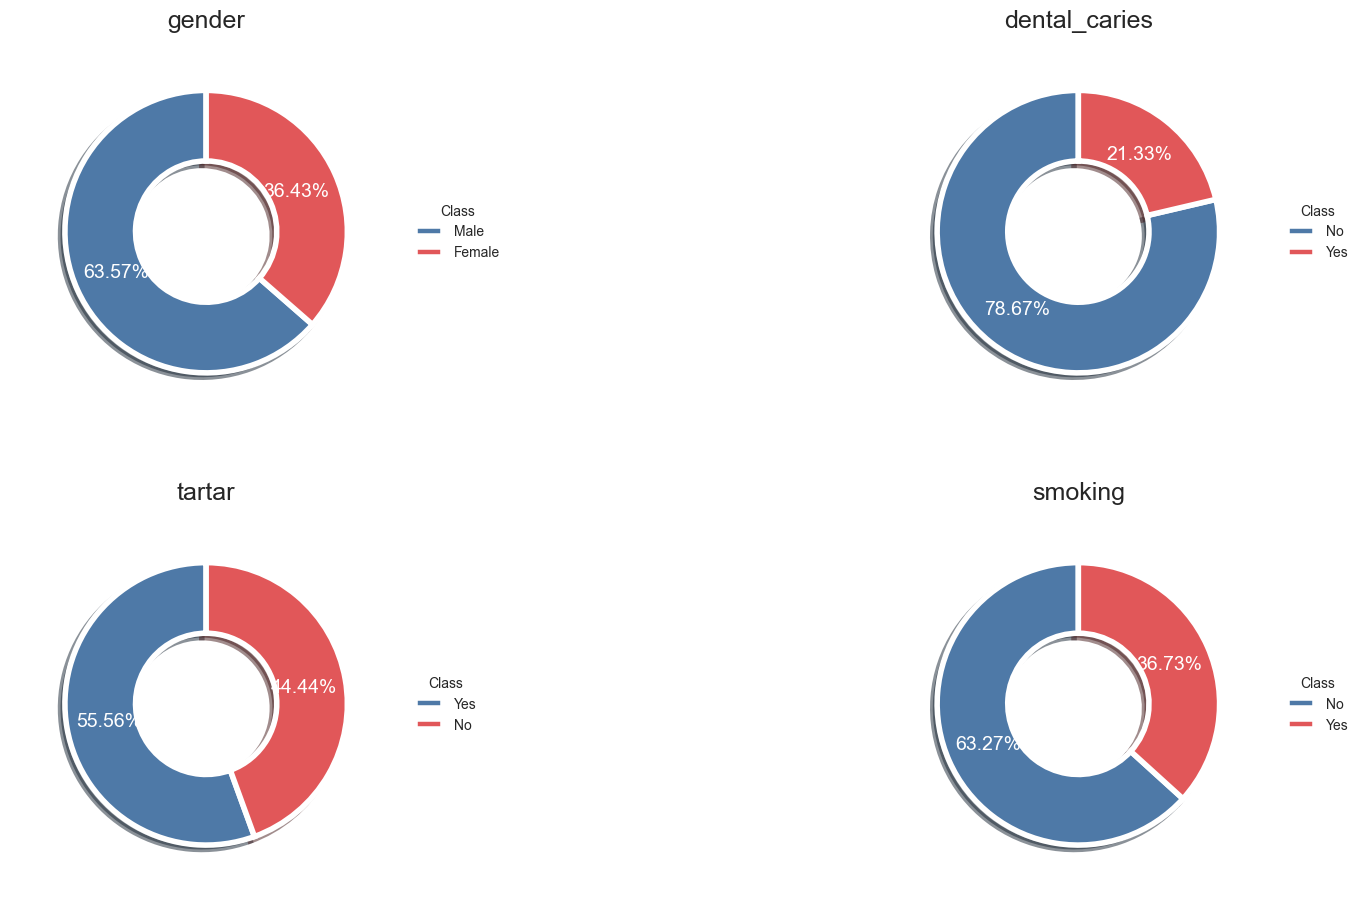

In [95]:
plot_binary_pie_charts(cat_columns, df)

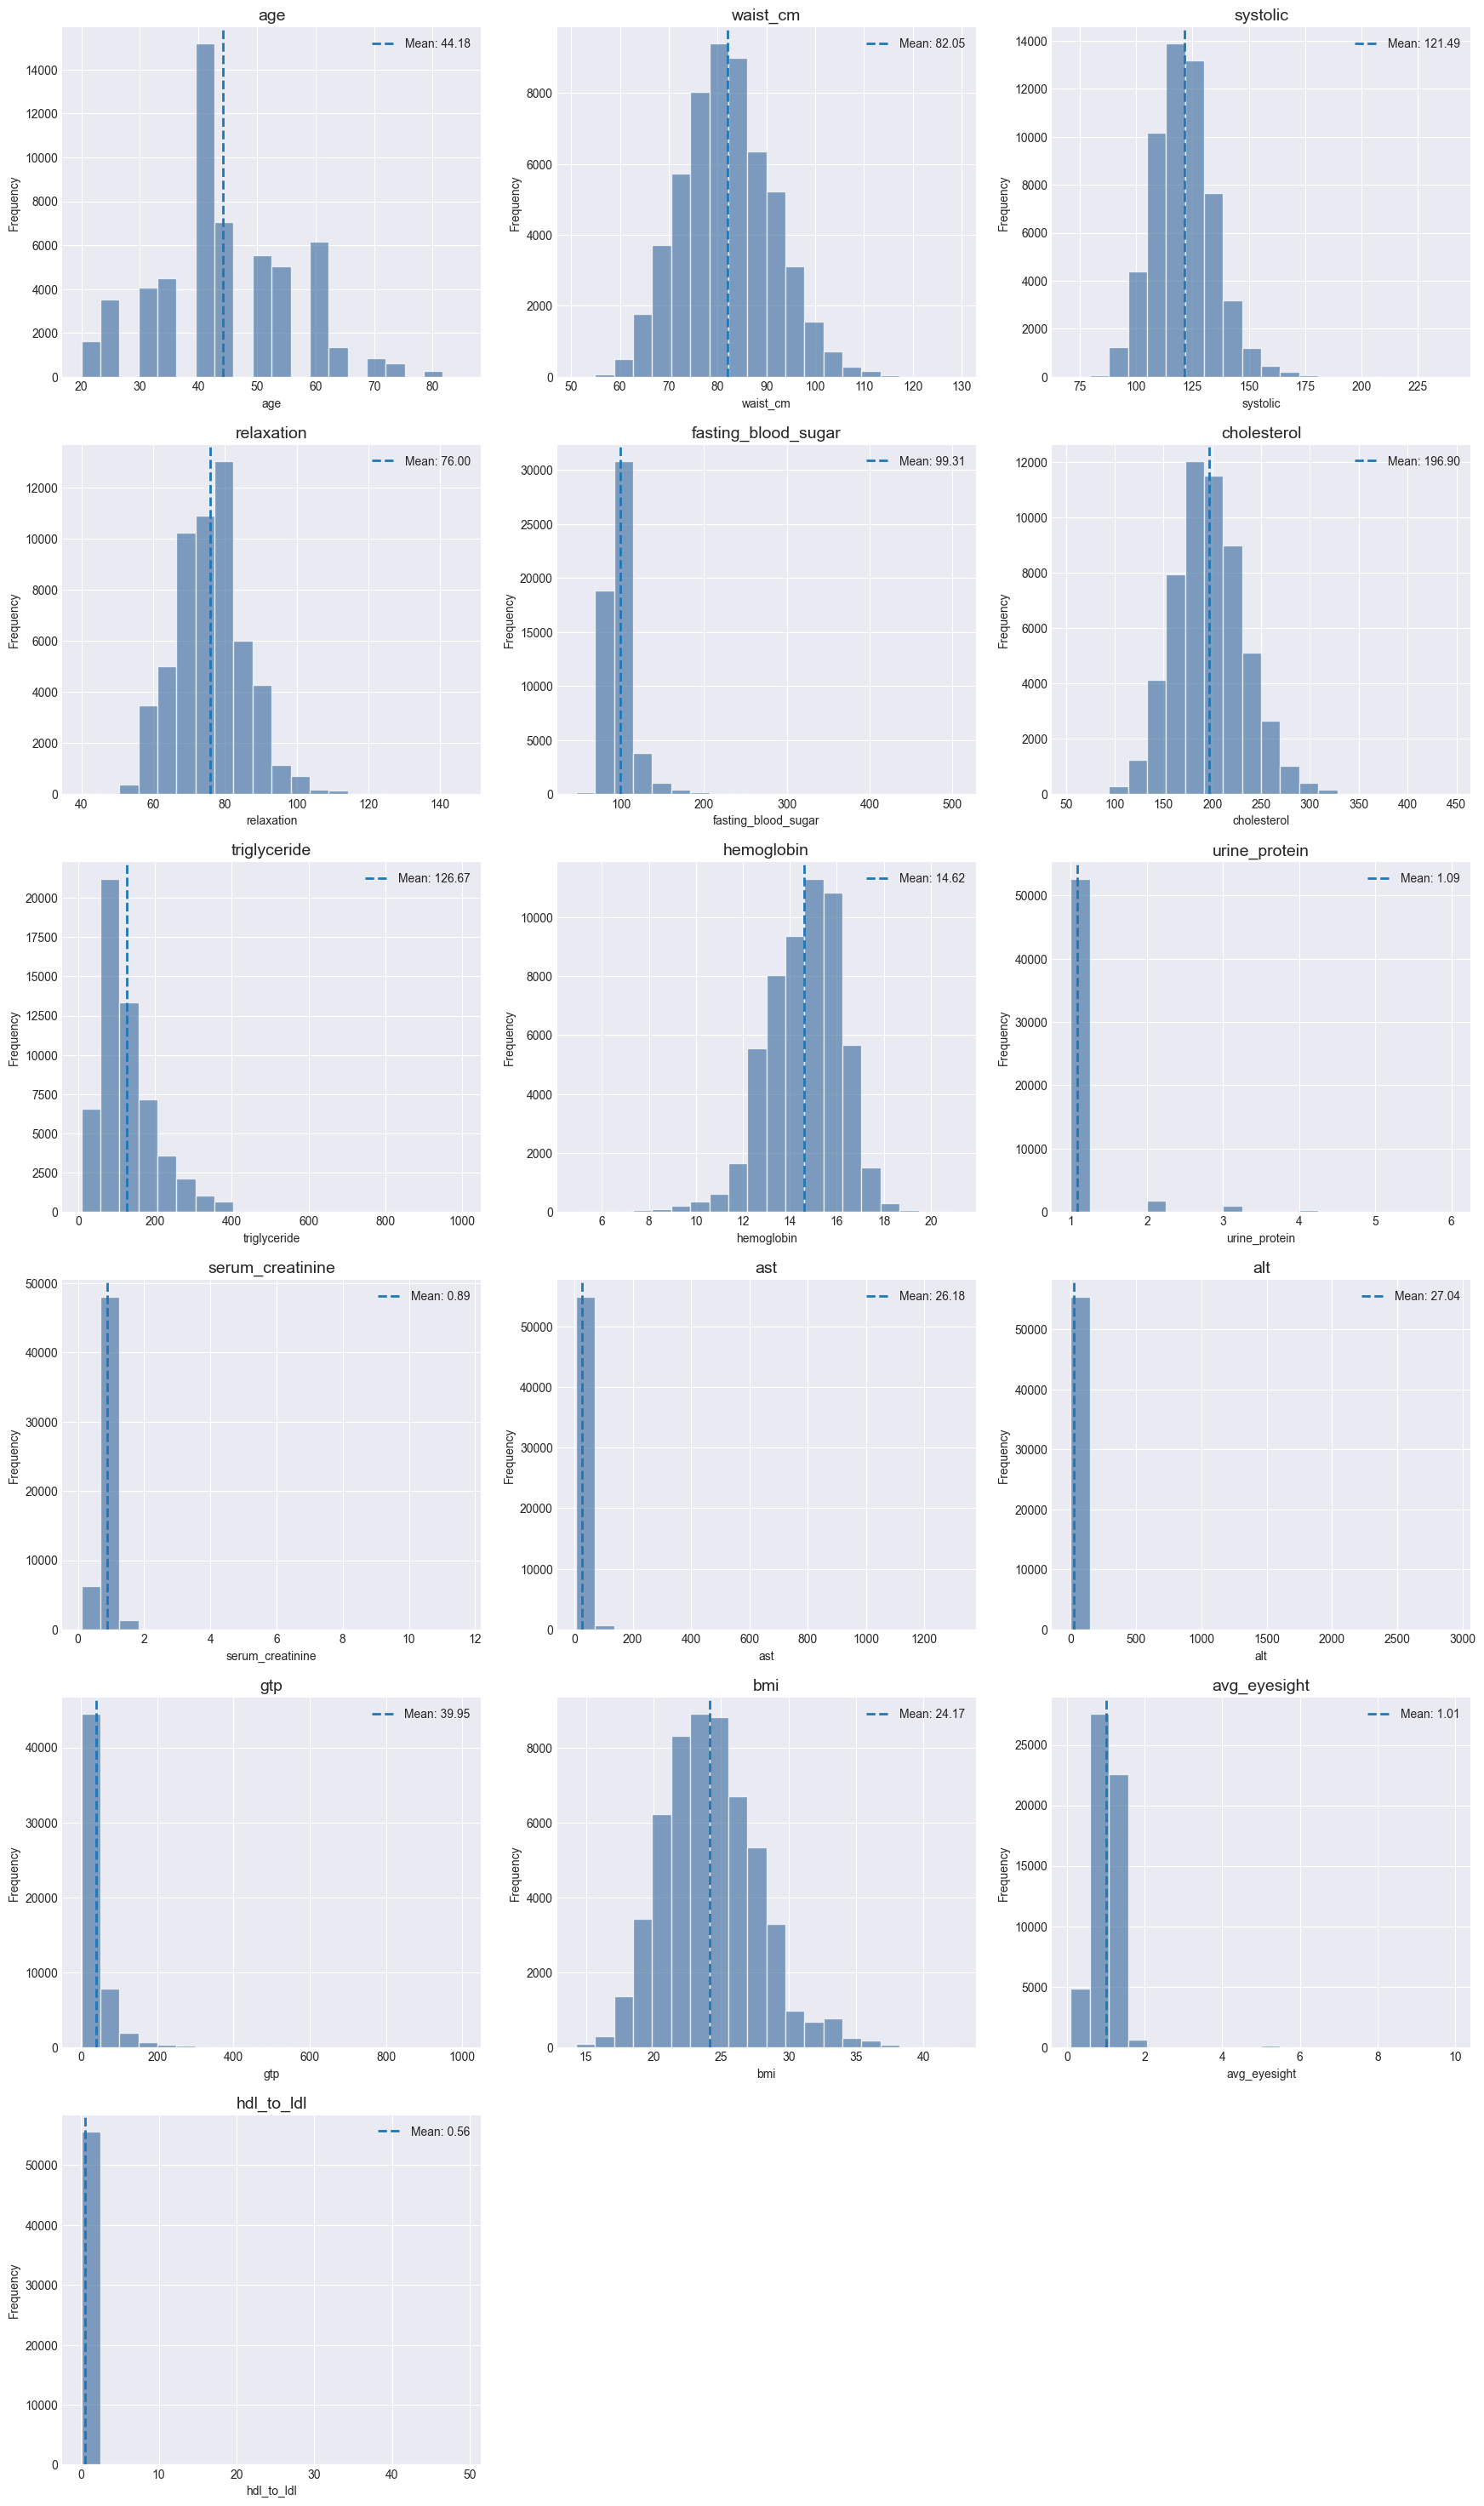

In [96]:
plot_histogram(numeric_cols, df)

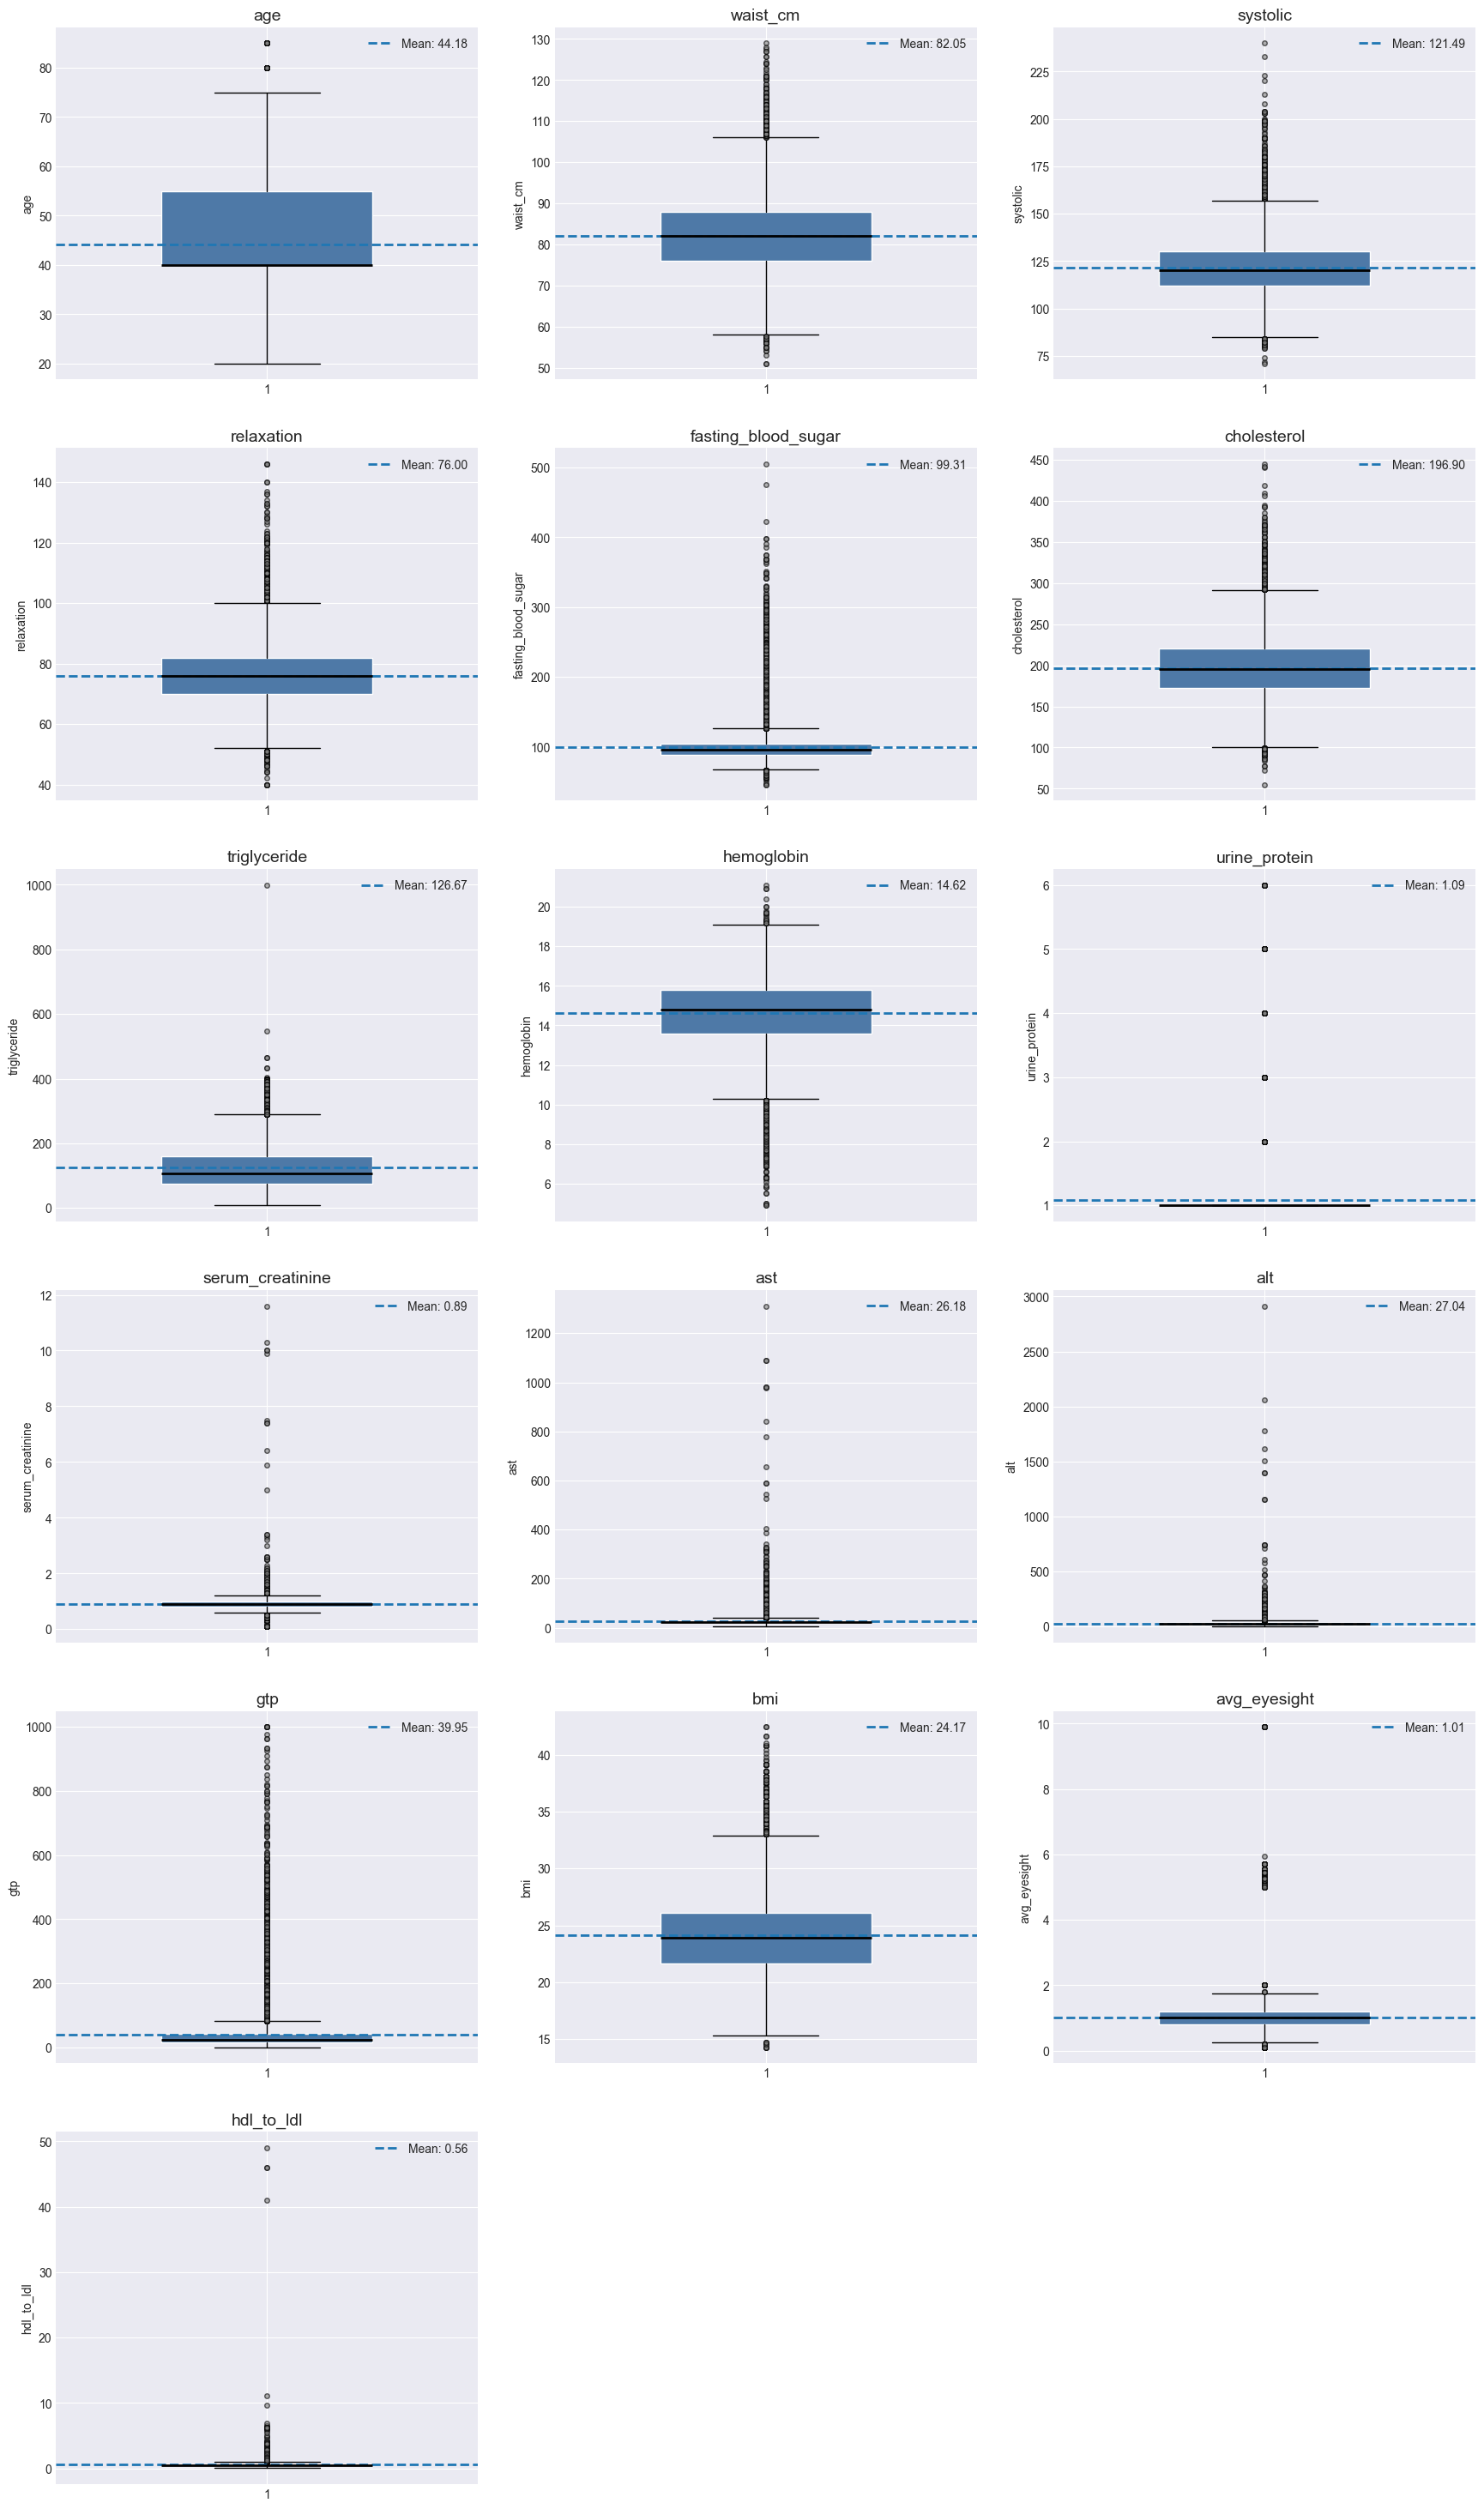

In [97]:
plot_boxplot(numeric_cols, df)

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Outliers
    </h4>
</div> 

Original shape: (55692, 20)
Without outliers: (32636, 20)


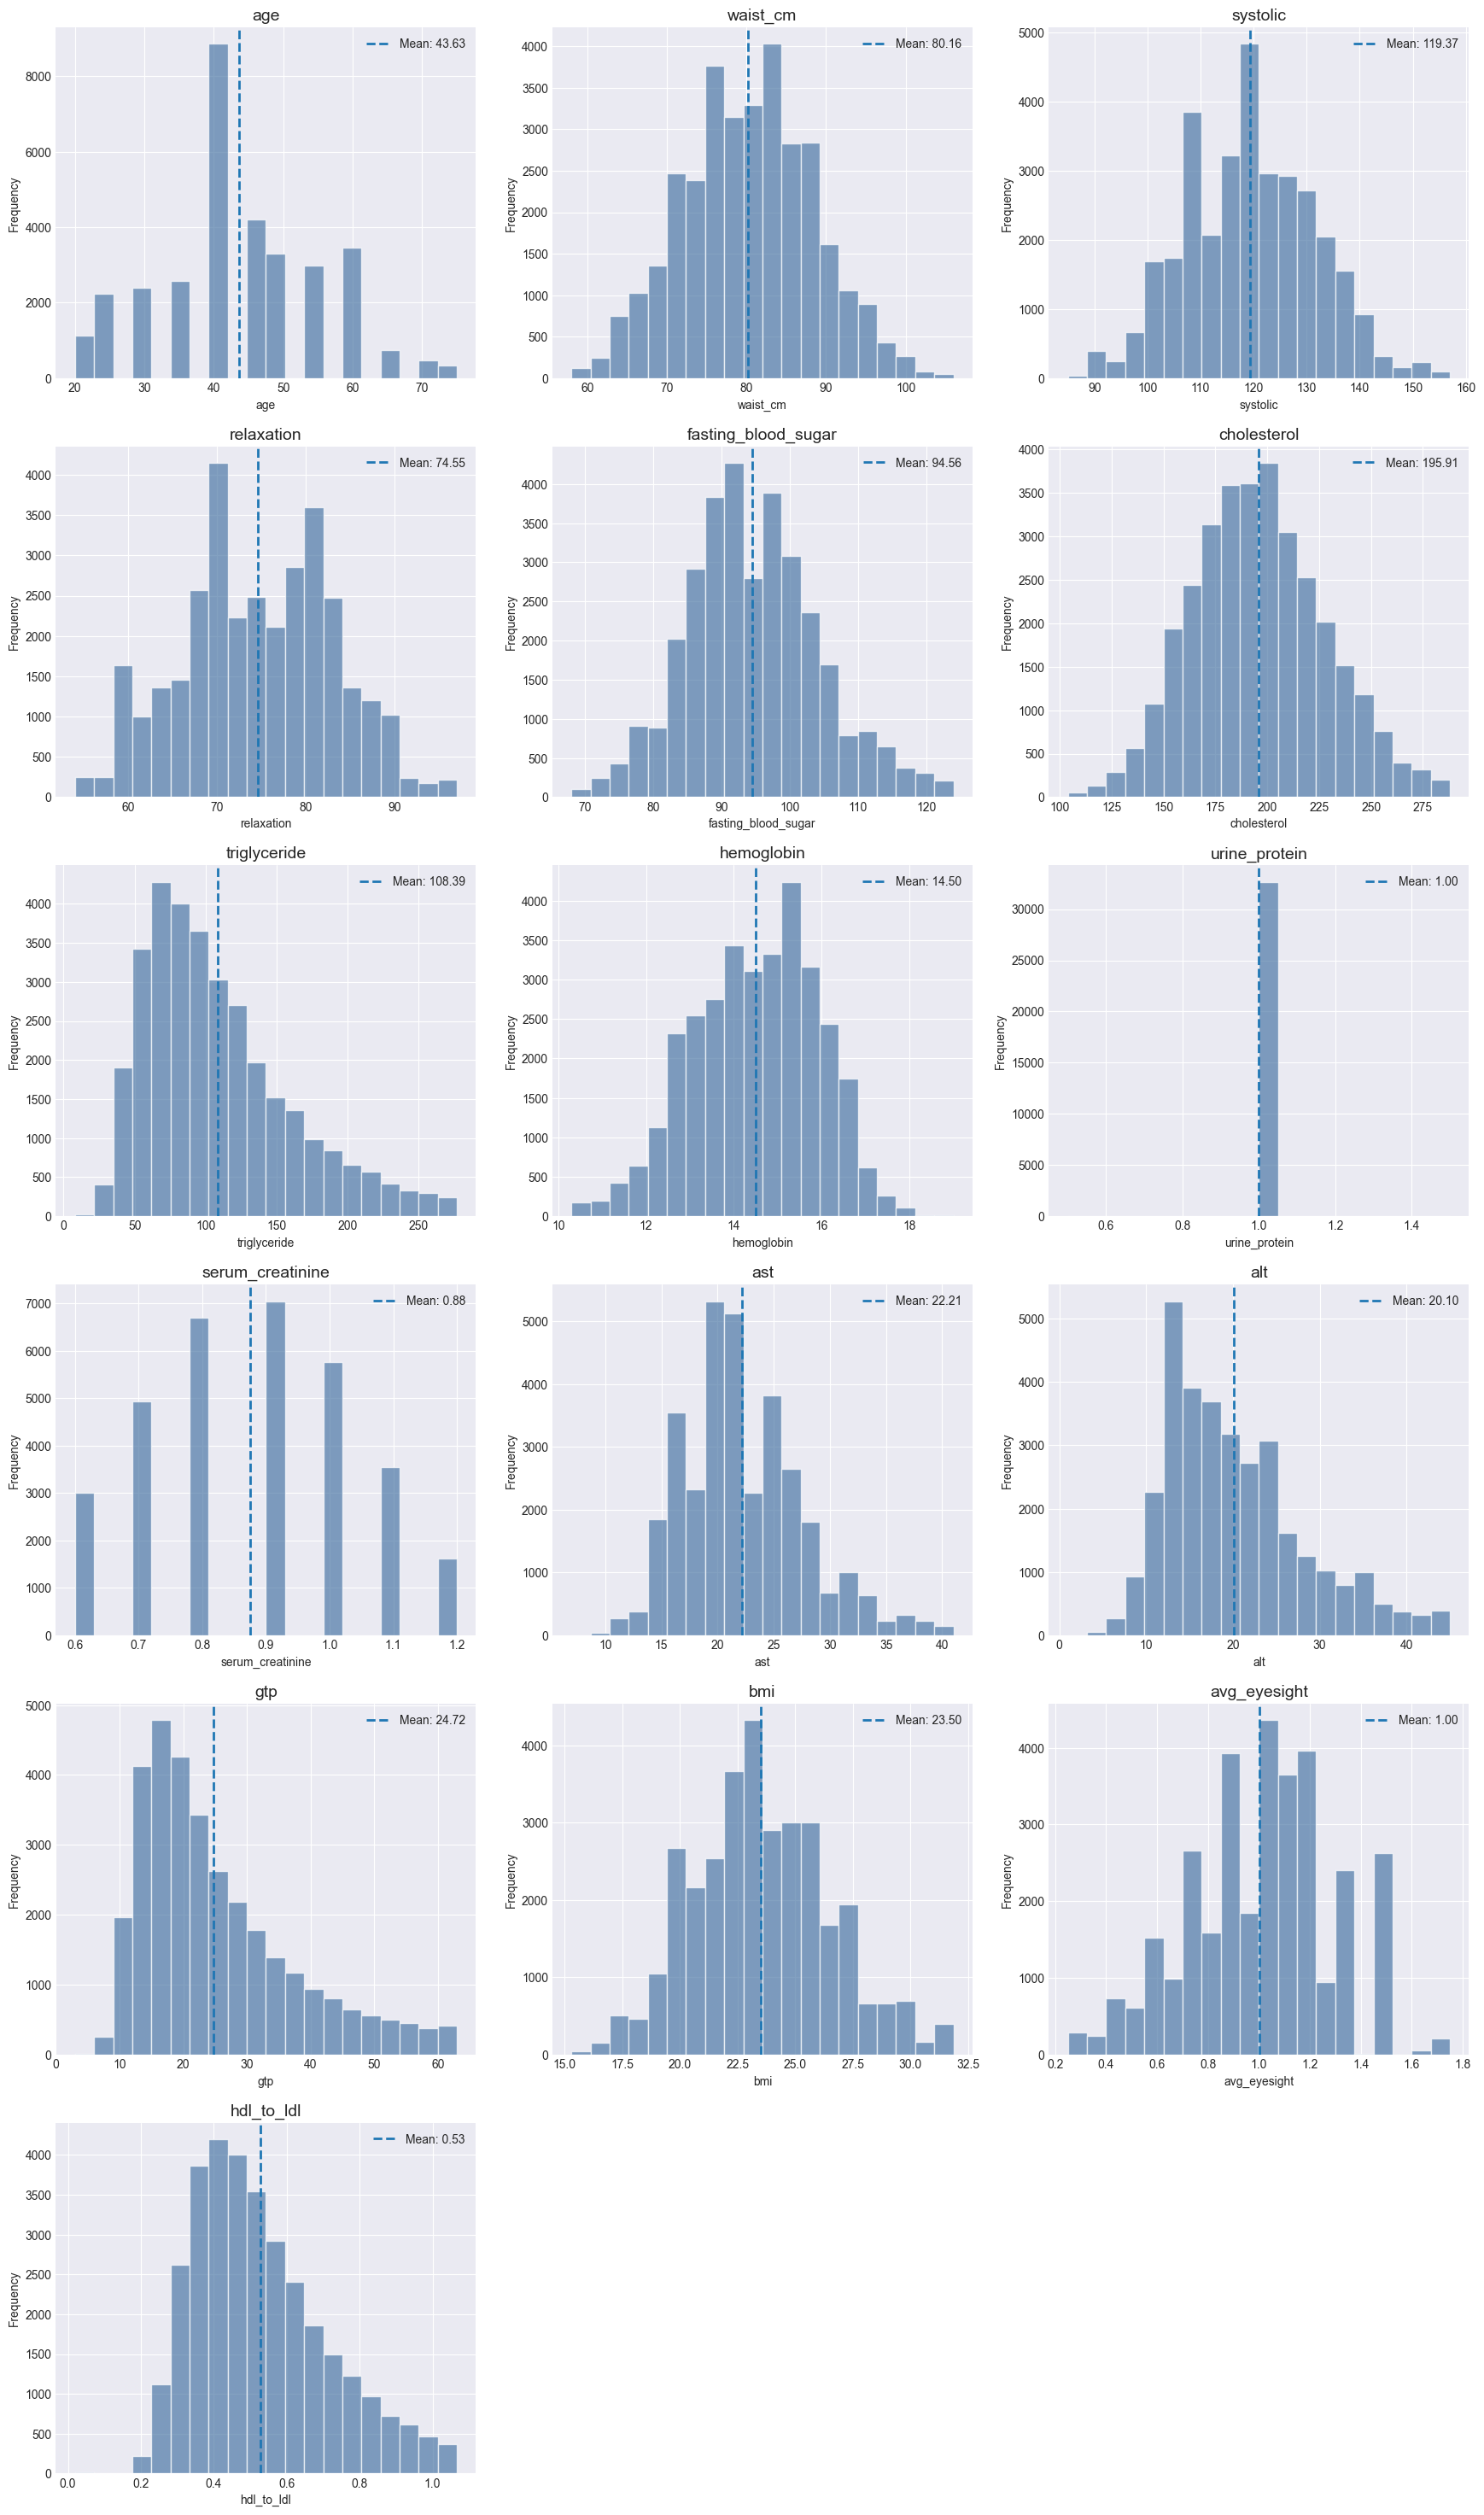

In [98]:
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

plot_histogram(numeric_cols, df_no_outliers)

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">
    Bivariate EDA
    </h2>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #ffffff; border-radius:6px; color:#000000;">
    ℹ️ Analyze relationships between two columns using correlations and group-wise statistics and visualize relationships using scatter plots and bar plots.
</div>


<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Numerical Correlations
    </h4>
</div> 

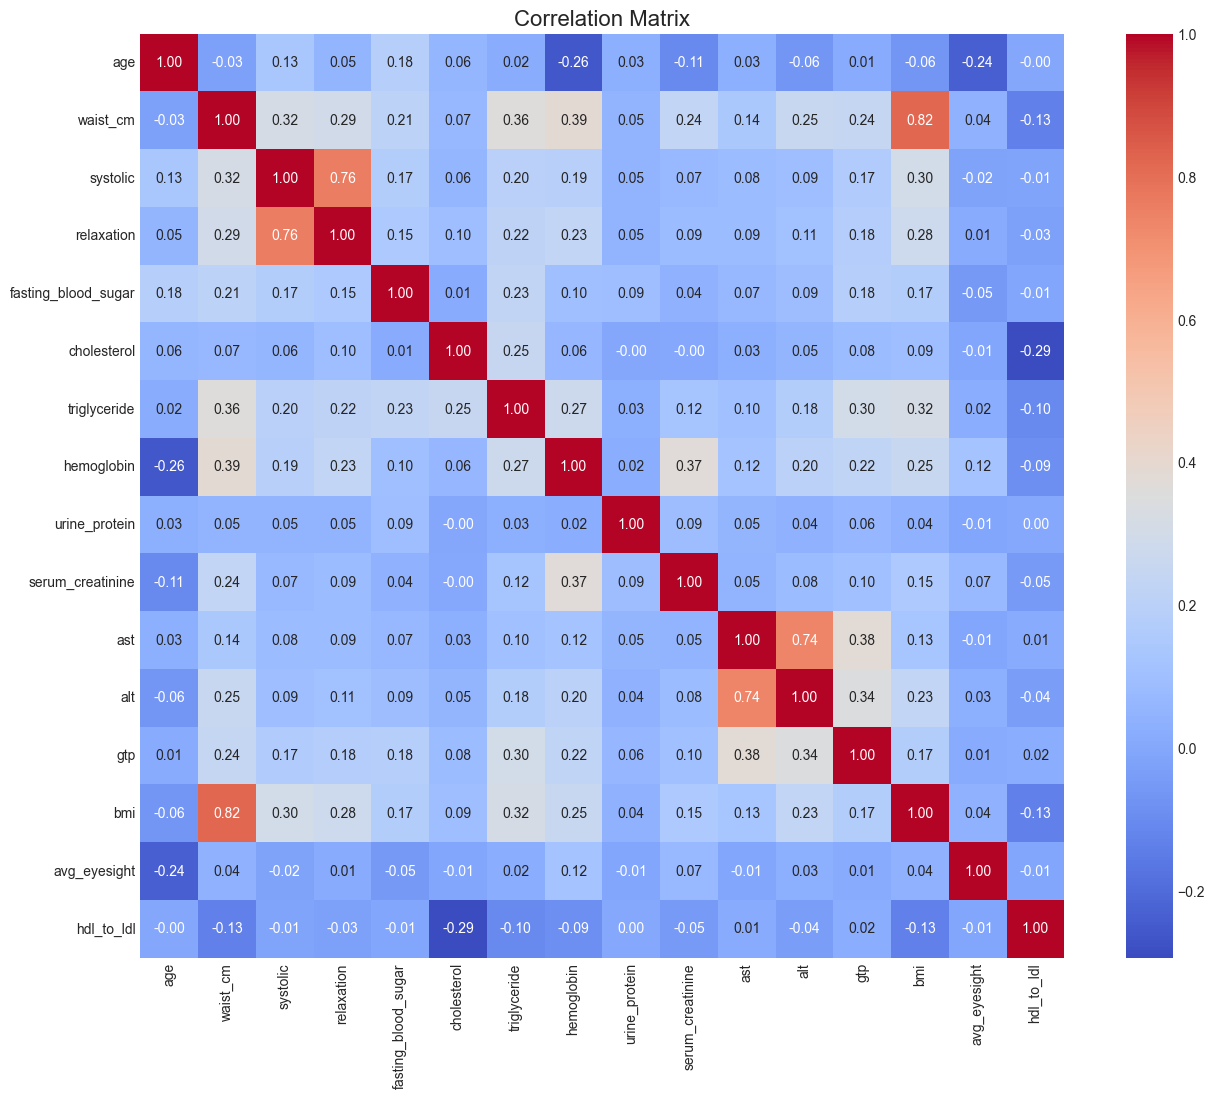

In [99]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Group-Based Analysis</h2>
</div>

<div style="background-color:#e8f4fd; padding:15px; border:3px solid #ffffff; border-radius:6px; color:#000000;">
    ℹ️ ???.
</div>


<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Smoking-Based Analysis (Non-Smoker vs Smoker)
    </h4>
</div> 

In [100]:
smoking_0 = df[df["smoking"] == "No"]
smoking_1 = df[df["smoking"] == "Yes"]


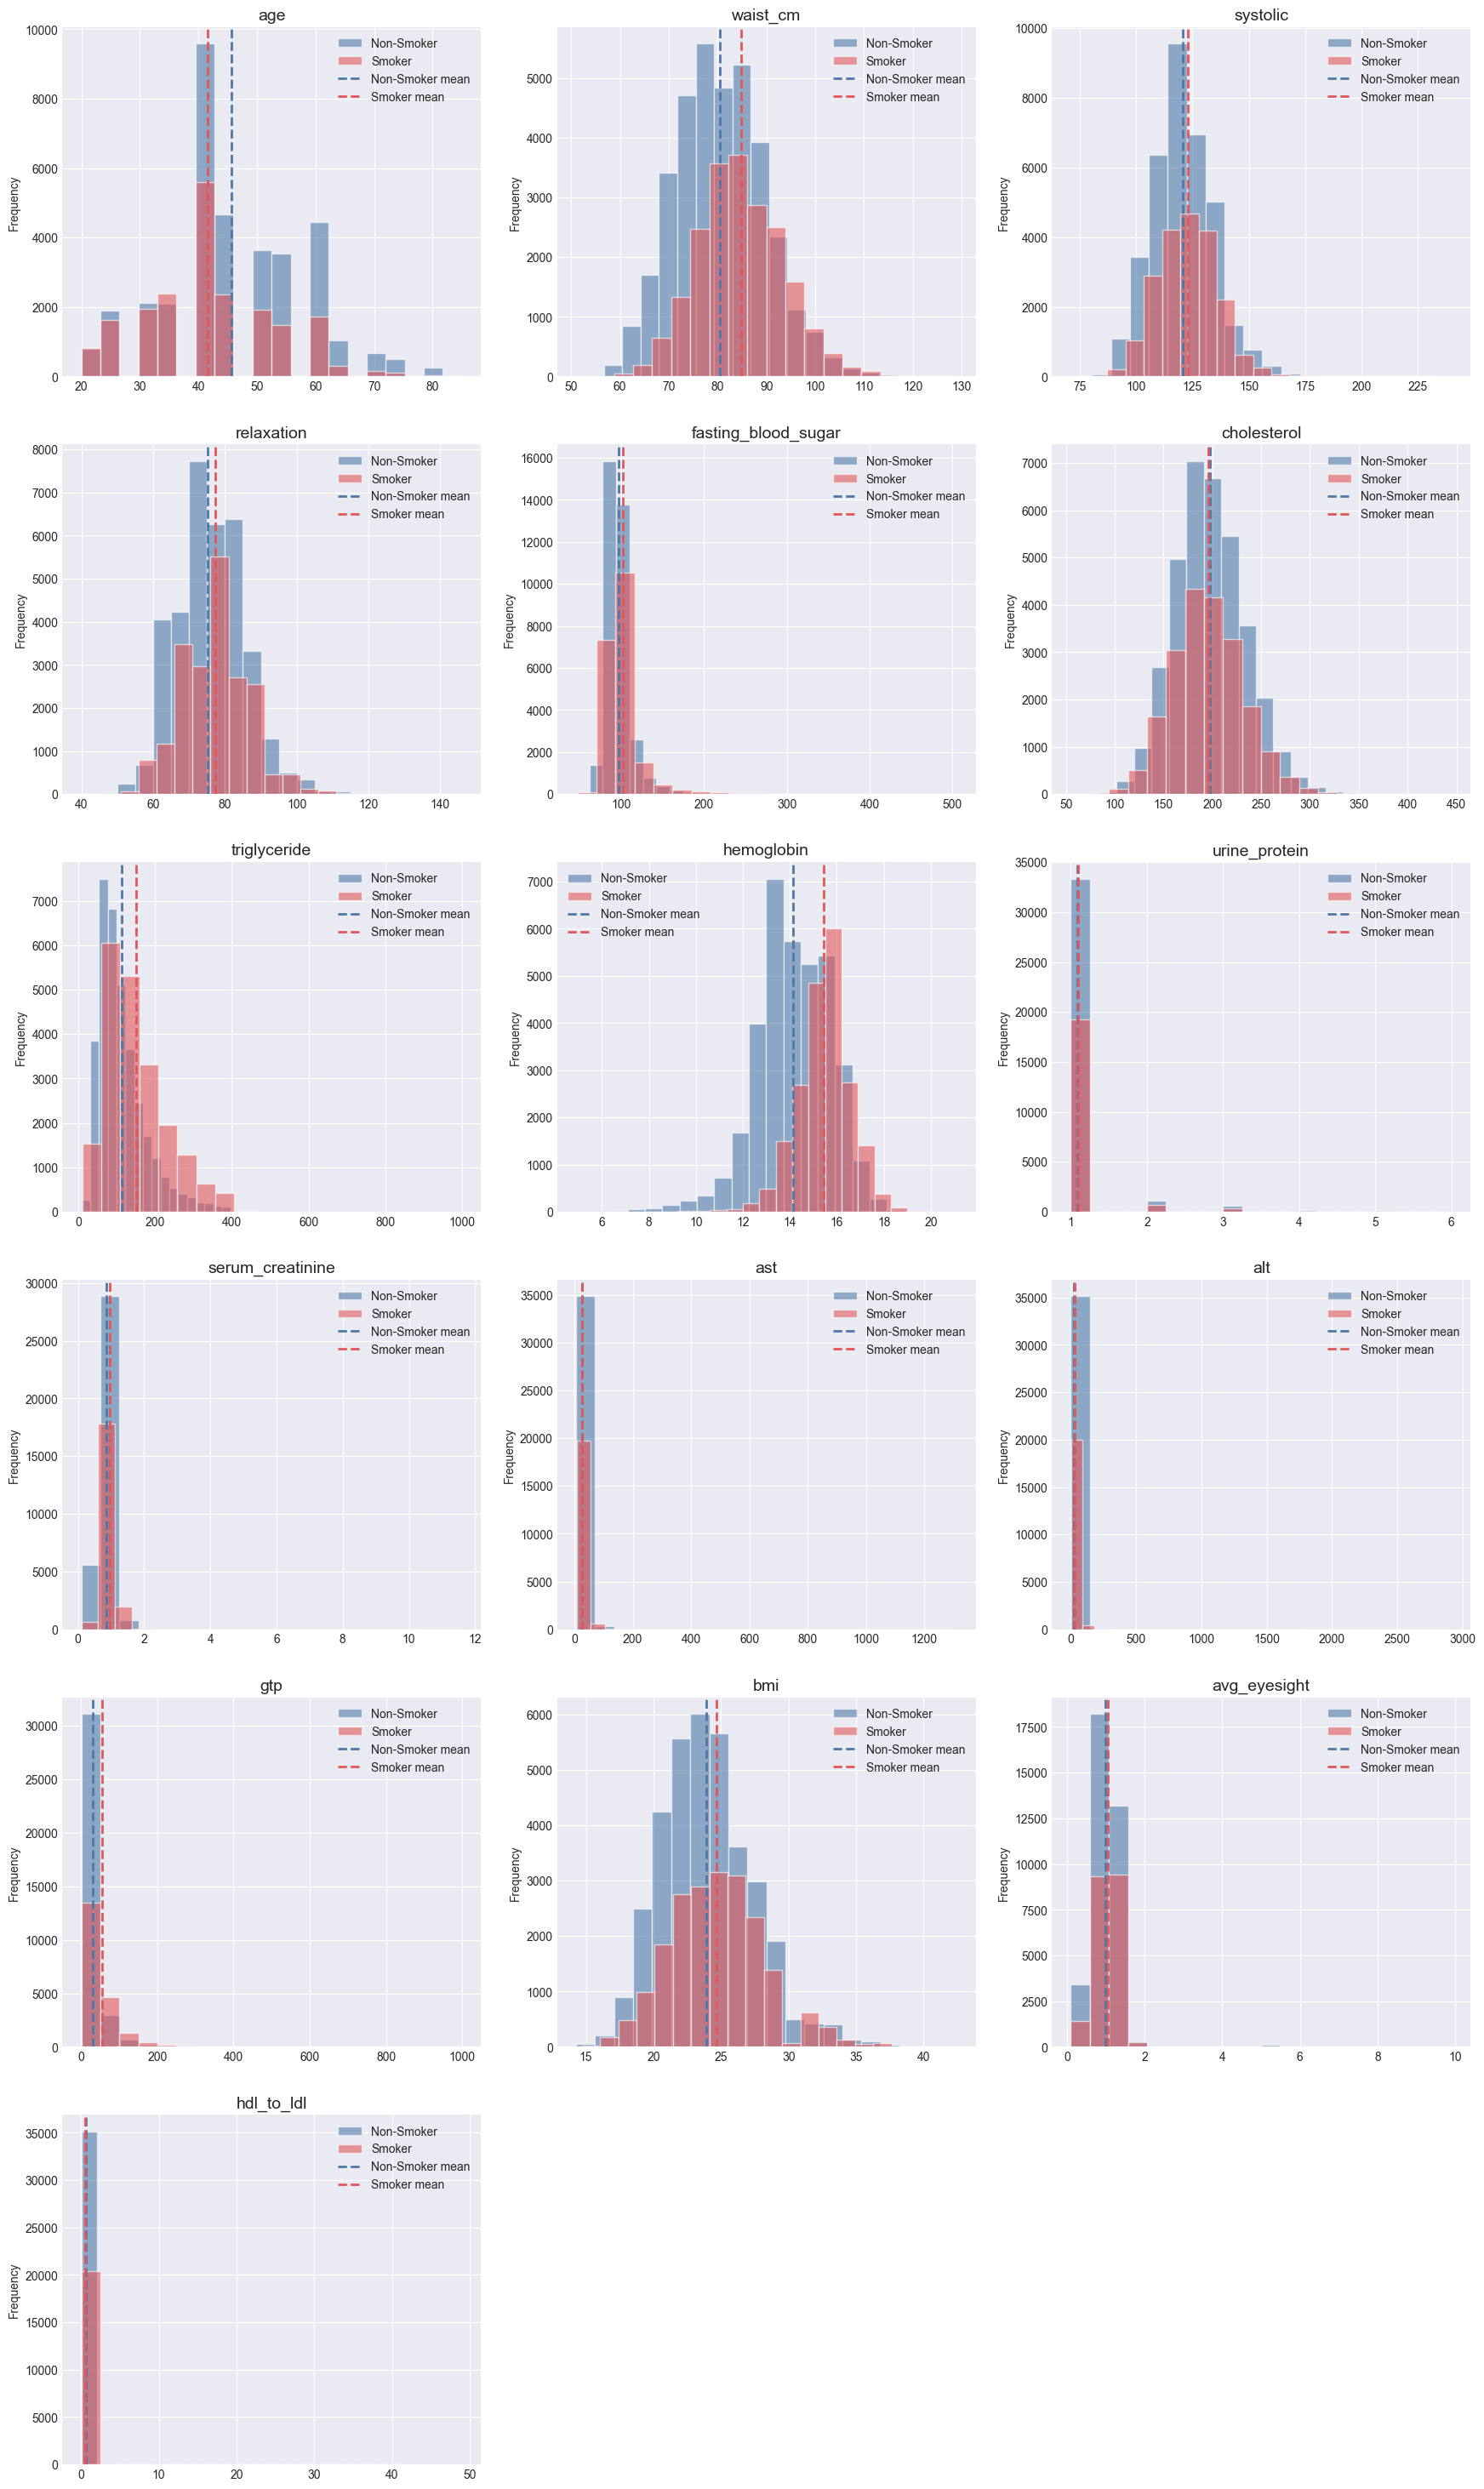

In [101]:
plot_comparison_histogram_style(numeric_cols, smoking_0, "Non-Smoker", smoking_1,"Smoker")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Outliers
    </h4>
</div> 

In [102]:
smoking_0_no_out = remove_outliers_iqr(smoking_0, numeric_cols)
smoking_1_no_out = remove_outliers_iqr(smoking_1, numeric_cols)

Original shape: (35237, 20)
Without outliers: (21971, 20)
Original shape: (20455, 20)
Without outliers: (12323, 20)


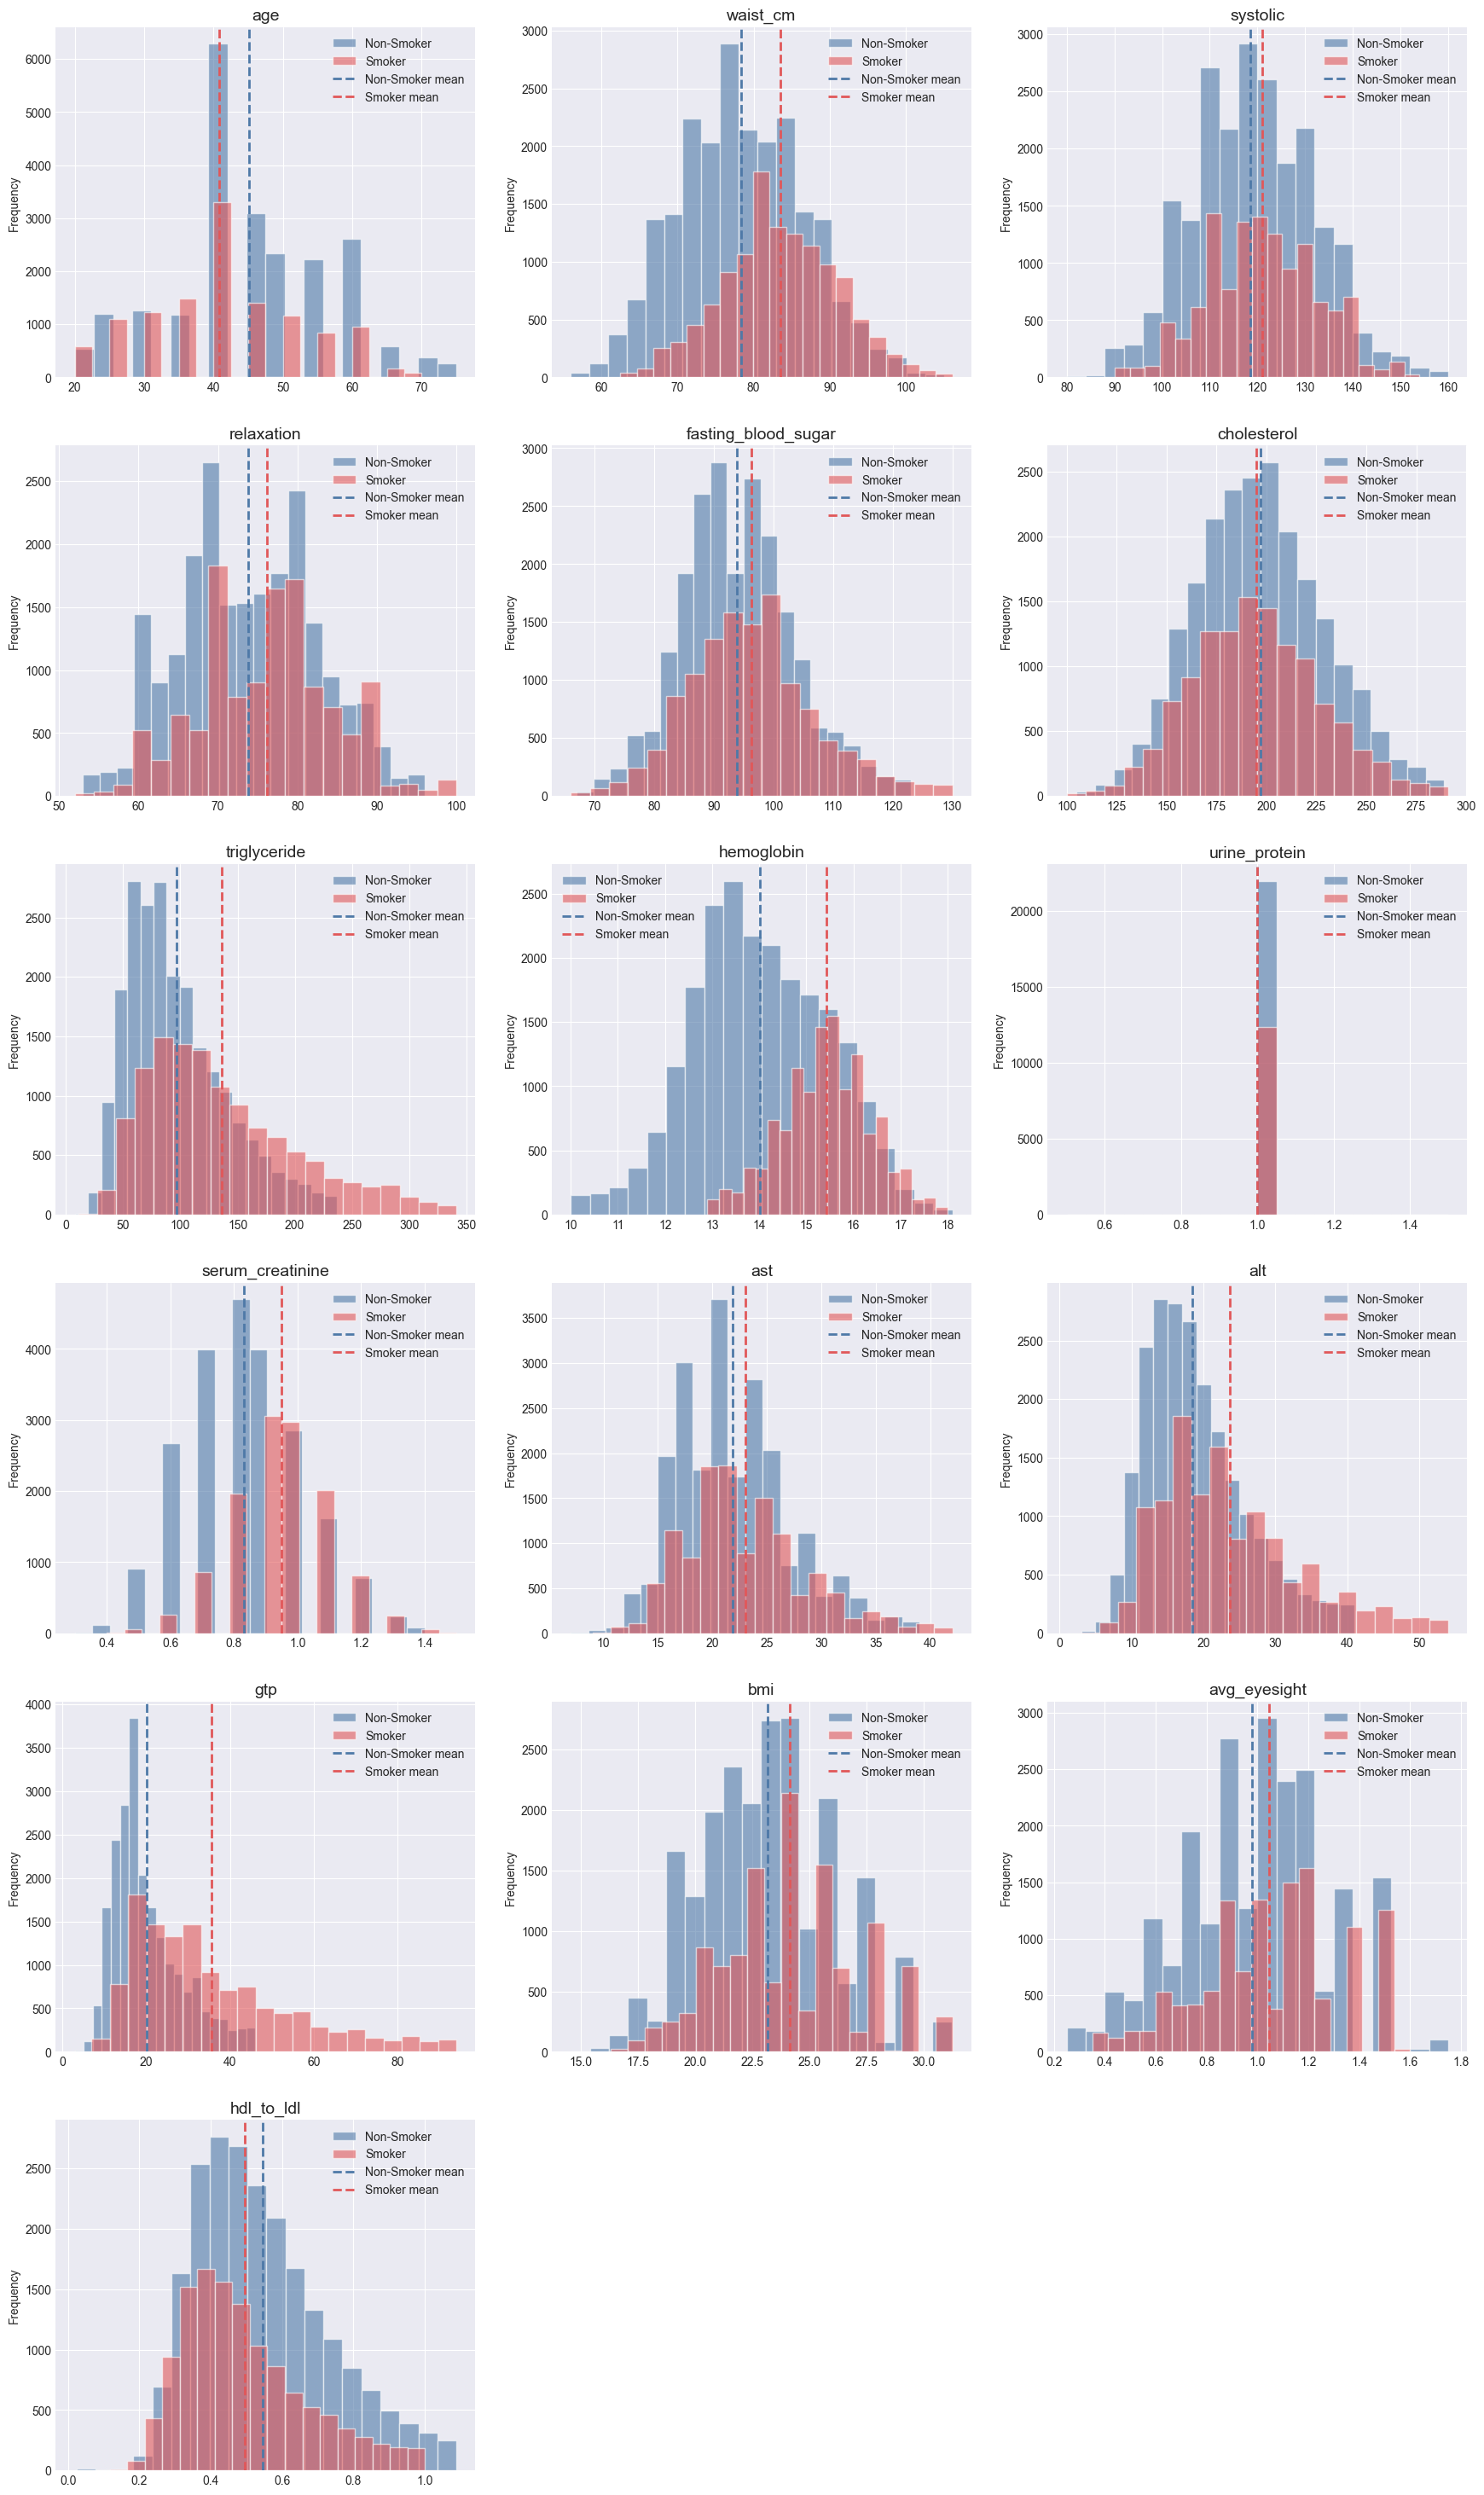

In [103]:
plot_comparison_histogram_style(numeric_cols, smoking_0_no_out,"Non-Smoker", smoking_1_no_out,"Smoker")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Hypotesis Test
    </h4>
</div> 

In [104]:
hypotesis_test_smokers = realizar_ttest(df, "smoking", numeric_cols)
hypotesis_test_smokers

Variable  Group 0 Mean  Group 1 Mean  T-Statistic   P-Value  \
0                   age       45.6780       41.6074      39.5056  0.000000   
1              waist_cm       80.4477       84.8005     -55.6869  0.000000   
2              systolic      120.7324      122.8065     -17.5930  0.000000   
3            relaxation       75.2061       77.3808     -25.8636  0.000000   
4   fasting_blood_sugar       97.7235      102.0493     -21.9395  0.000000   
5           cholesterol      197.6909      195.5414       6.7280  0.000000   
6          triglyceride      112.9220      150.3415     -58.0610  0.000000   
7            hemoglobin       14.1450       15.4453    -112.2870  0.000000   
8      serum_creatinine        0.8491        0.9488     -54.2822  0.000000   
9                   ast       25.3091       27.6882     -13.7950  0.000000   
10                  alt       24.7409       30.9898     -23.4493  0.000000   
11                  gtp       30.8859       55.5704     -49.9342  0.000000   
12         avg_eyesight        0.9870        1.0497     -18.0669  0.000000   
13                  bmi       23.8823       24.6539     -25.1851  0.000000   
14        urine_protein        1.0828        1.0948      -3.2886  0.001008   
15           hdl_to_ldl        0.5656        0.5523       2.6998  0.006943   

    Cohen_d     Result  
0    0.3445  Reject H0  
1   -0.4856  Reject H0  
2   -0.1533  Reject H0  
3   -0.2267  Reject H0  
4   -0.2005  Reject H0  
5    0.0592  Reject H0  
6   -0.5244  Reject H0  
7   -0.9446  Reject H0  
8   -0.4687  Reject H0  
9   -0.1222  Reject H0  
10  -0.2045  Reject H0  
11  -0.4686  Reject H0  
12  -0.1579  Reject H0  
13  -0.2223  Reject H0  
14  -0.0292  Reject H0  
15   0.0254  Reject H0

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Categorical Columns
    </h4>
</div> 

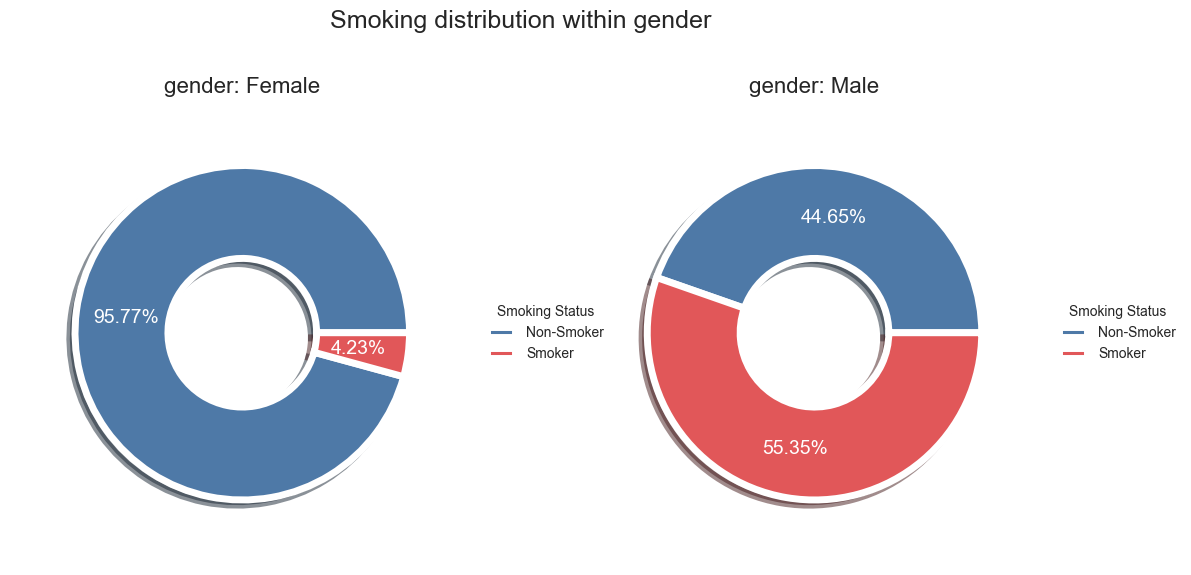

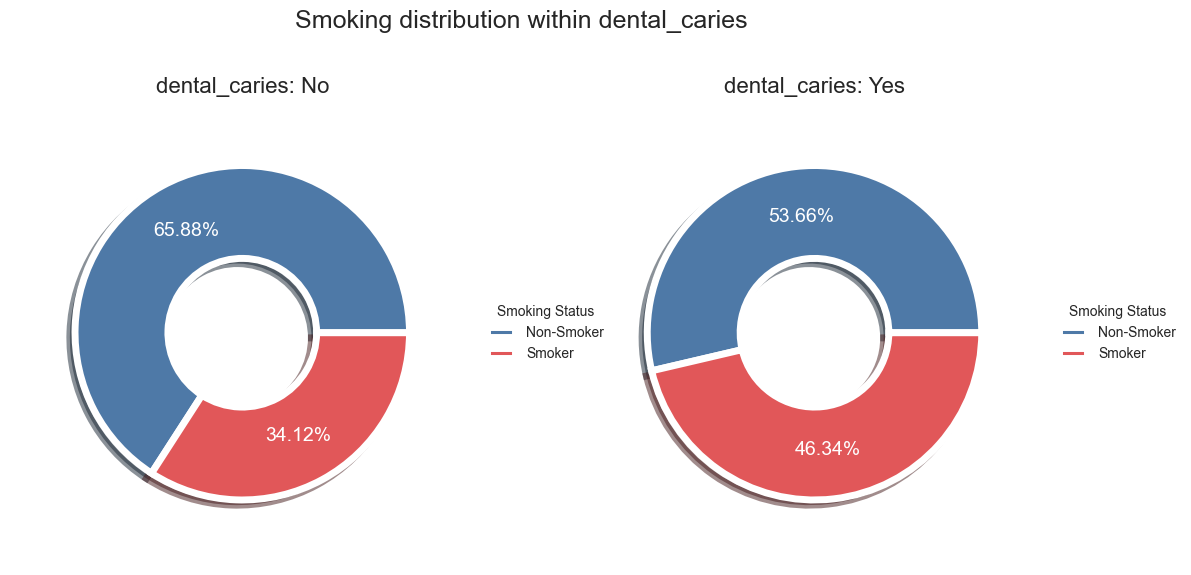

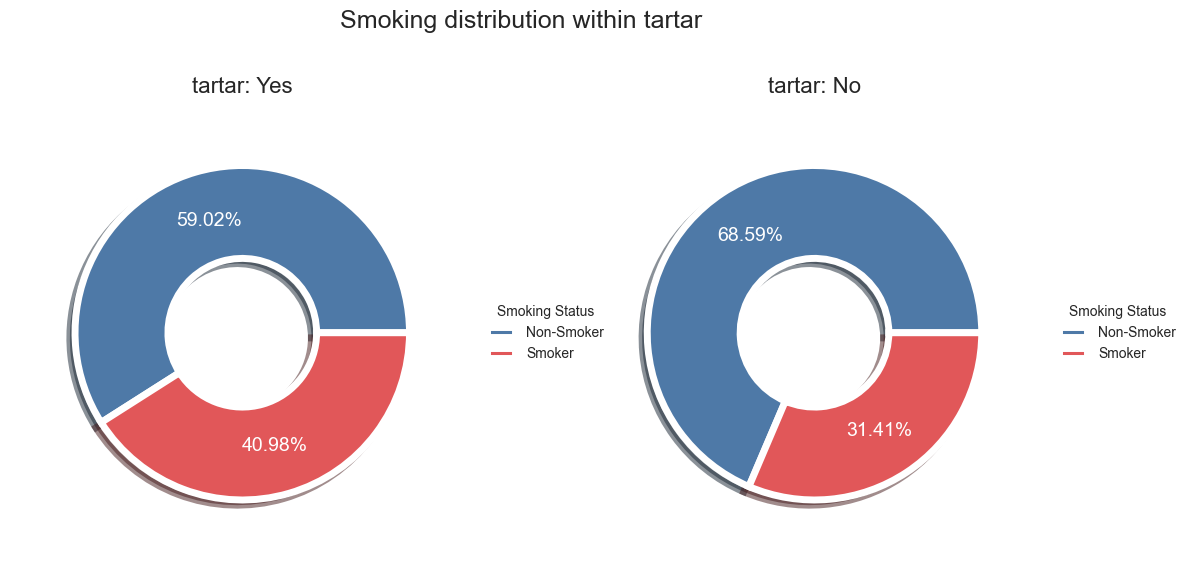

In [105]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in ["smoking"]]

for col in categorical_cols:

    categories = df[col].dropna().unique()
    n_cat = len(categories)

    fig, axs = plt.subplots(1, n_cat, figsize=(6 * n_cat, 6))
    if n_cat == 1:
        axs = [axs]

    plt.tight_layout(pad=4.0)

    for i, category in enumerate(categories):
        ax = axs[i]

        subset = df[df[col] == category]

        counts = subset["smoking"].value_counts().reindex(["No", "Yes"], fill_value=0)

        labels = ["Non-Smoker", "Smoker"]
        colors = ["#4e79a7", "#e15759"]

        ax.pie(
            counts.values,
            autopct="%.2f%%",
            pctdistance=0.7,
            startangle=0,
            radius=0.9,
            colors=colors,
            shadow=True,
            textprops=dict(color="white", size=14),
            wedgeprops=dict(width=0.5, edgecolor="white", linewidth=5)
        )

        ax.set_title(f"{col}: {category}", fontsize=16)

        ax.legend(
            labels,
            title="Smoking Status",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )

    plt.suptitle(
        f"Smoking distribution within {col}",
        fontsize=18,
        y=1.05
    )

    plt.show()


<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Smoking-Male-Based Analysis (Male Non-Smoker vs Male Smoker)
    </h4>
</div> 

In [106]:
smoking_male = smoking_1[smoking_1["gender"] == "Male"]
no_smoking_male = smoking_0[smoking_0["gender"] == "Male"]

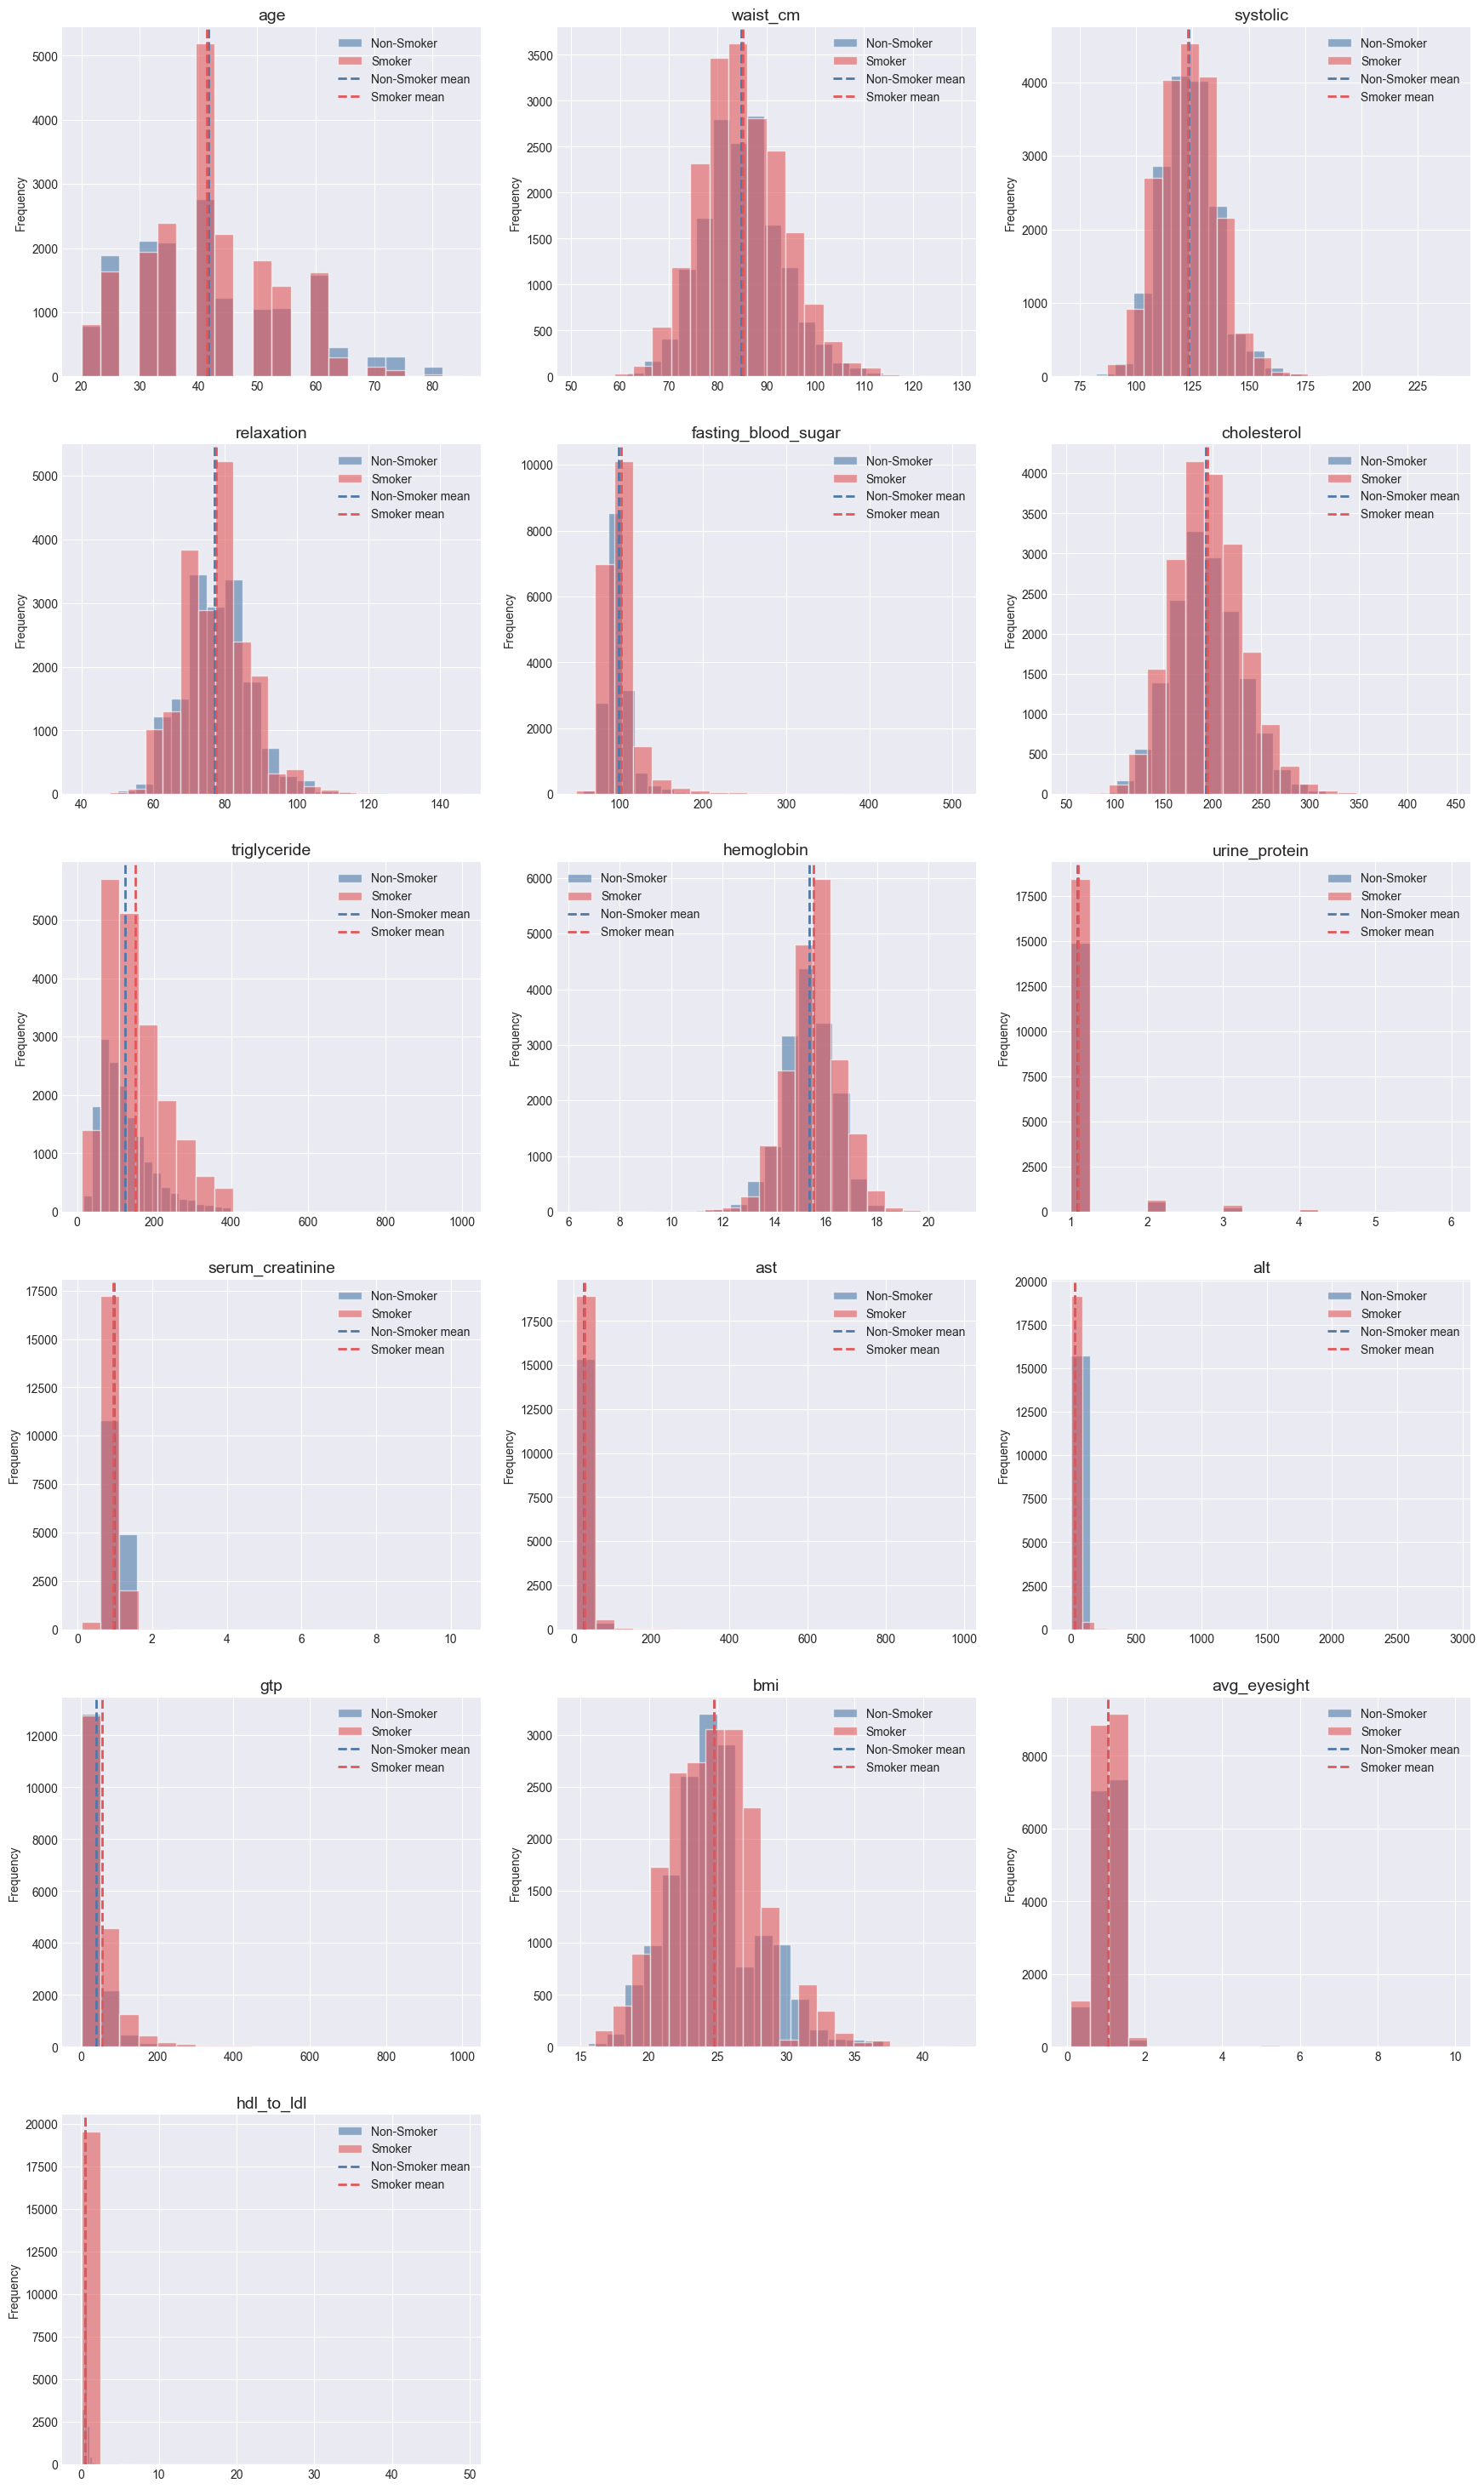

In [107]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Non-Smoker",smoking_male,"Smoker")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Outliers
    </h4>
</div> 

In [108]:
smoking_male_ou = remove_outliers_iqr(smoking_male,numeric_cols)
no_smoking_male_ou = remove_outliers_iqr(no_smoking_male,numeric_cols)

Original shape: (19596, 20)
Without outliers: (11917, 20)
Original shape: (15805, 20)
Without outliers: (9710, 20)


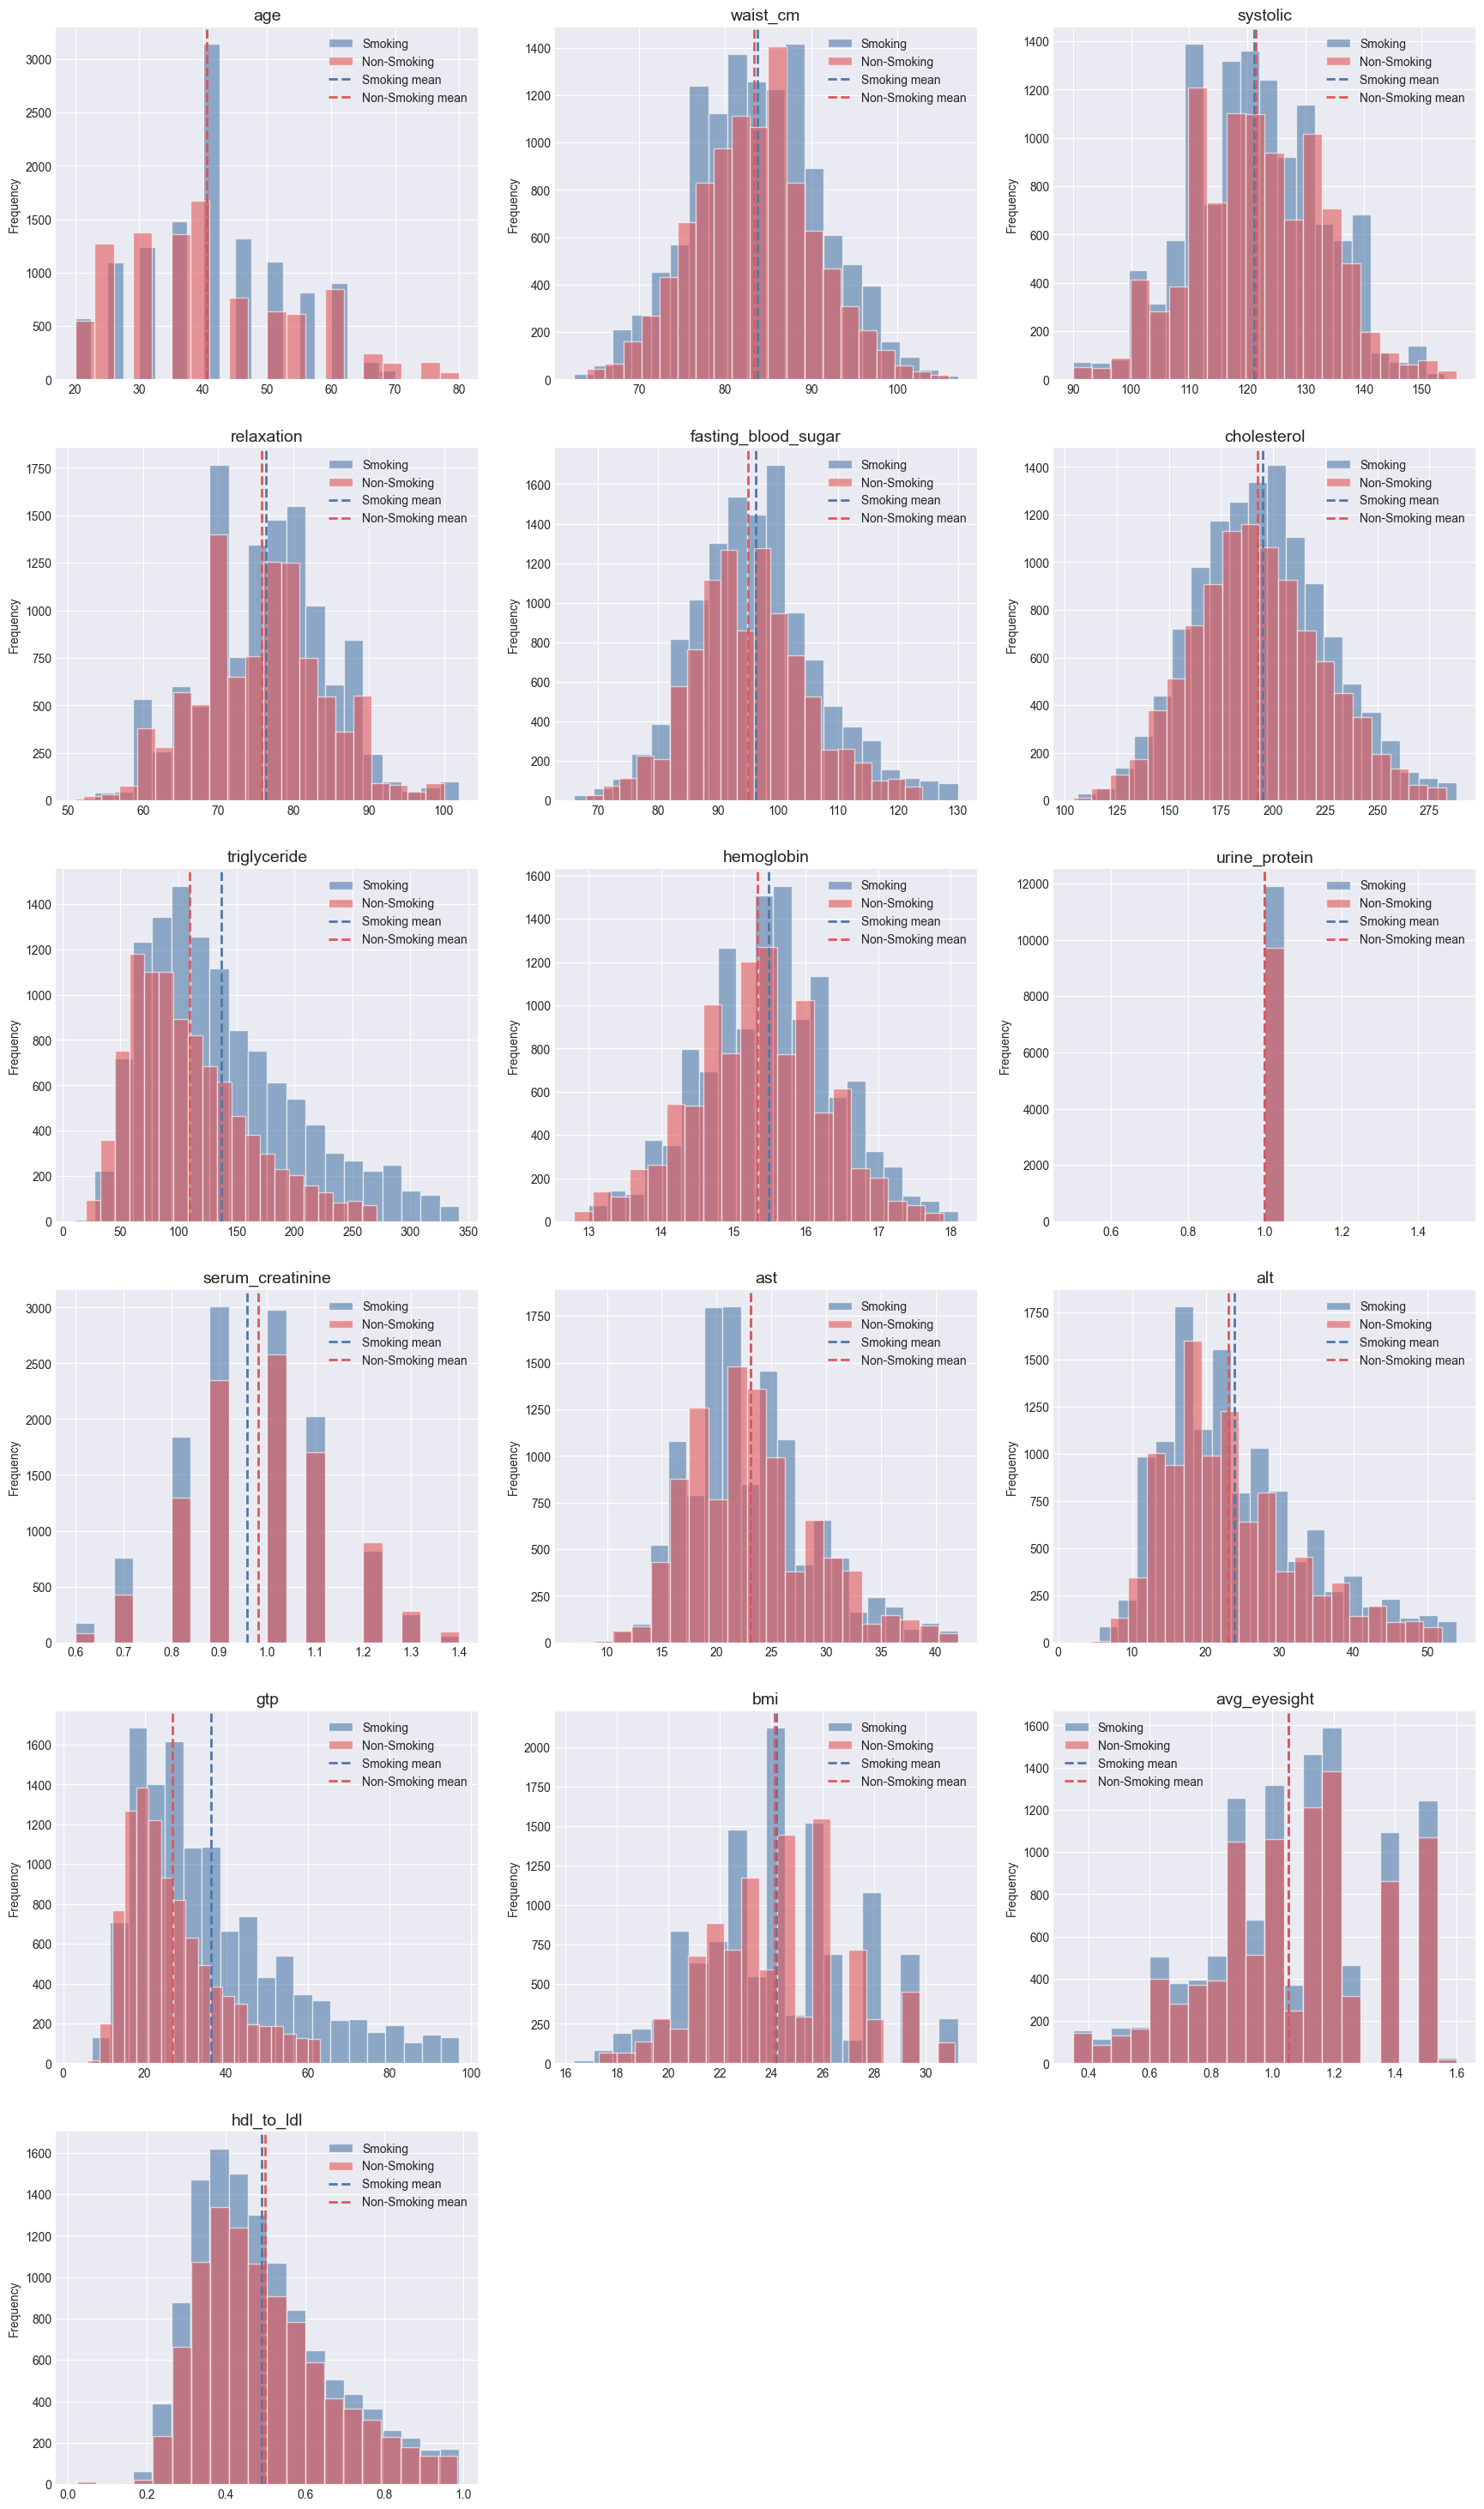

In [109]:
plot_comparison_histogram_style(numeric_cols,smoking_male_ou,"Smoking",no_smoking_male_ou,"Non-Smoking")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Hypotesis Test
    </h4>
</div> 

In [110]:
hypotesis_test_smokers_male = realizar_ttest(df[df["gender"]=="Male"], "smoking", numeric_cols)
hypotesis_test_smokers_male

Variable  Group 0 Mean  Group 1 Mean  T-Statistic   P-Value  \
0            relaxation       77.5679       76.9866       5.7588  0.000000   
1            hemoglobin       15.5322       15.3578      15.6355  0.000000   
2          triglyceride      151.4813      125.2385      33.5524  0.000000   
3   fasting_blood_sugar      102.1747       99.2234      12.7094  0.000000   
4                   gtp       56.4416       39.7421      28.3967  0.000000   
5      serum_creatinine        0.9583        0.9863     -12.6502  0.000000   
6           cholesterol      195.3876      193.5298       4.8397  0.000001   
7            hdl_to_ldl        0.5477        0.5269       4.0385  0.000054   
8              waist_cm       85.1336       84.8172       3.5733  0.000353   
9                   alt       31.4639       30.3577       3.1648  0.001554   
10                  ast       27.8737       27.2282       3.1437  0.001669   
11                  age       41.3980       41.6976      -2.1453  0.031940   
12             systolic      123.1052      123.3764      -1.9553  0.050554   
13        urine_protein        1.0954        1.0879       1.6898  0.091069   
14         avg_eyesight        1.0561        1.0573      -0.2640  0.791810   
15                  bmi       24.7259       24.7320      -0.1691  0.865690   

    Cohen_d             Result  
0    0.0616          Reject H0  
1    0.1669          Reject H0  
2    0.3561          Reject H0  
3    0.1339          Reject H0  
4    0.2975          Reject H0  
5   -0.1360          Reject H0  
6    0.0517          Reject H0  
7    0.0414          Reject H0  
8    0.0381          Reject H0  
9    0.0341          Reject H0  
10   0.0334          Reject H0  
11  -0.0232          Reject H0  
12  -0.0209  Fail to Reject H0  
13   0.0180  Fail to Reject H0  
14  -0.0028  Fail to Reject H0  
15  -0.0018  Fail to Reject H0

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Gender-Based Analysis (Male vs Female)
    </h4>
</div> 

In [111]:
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

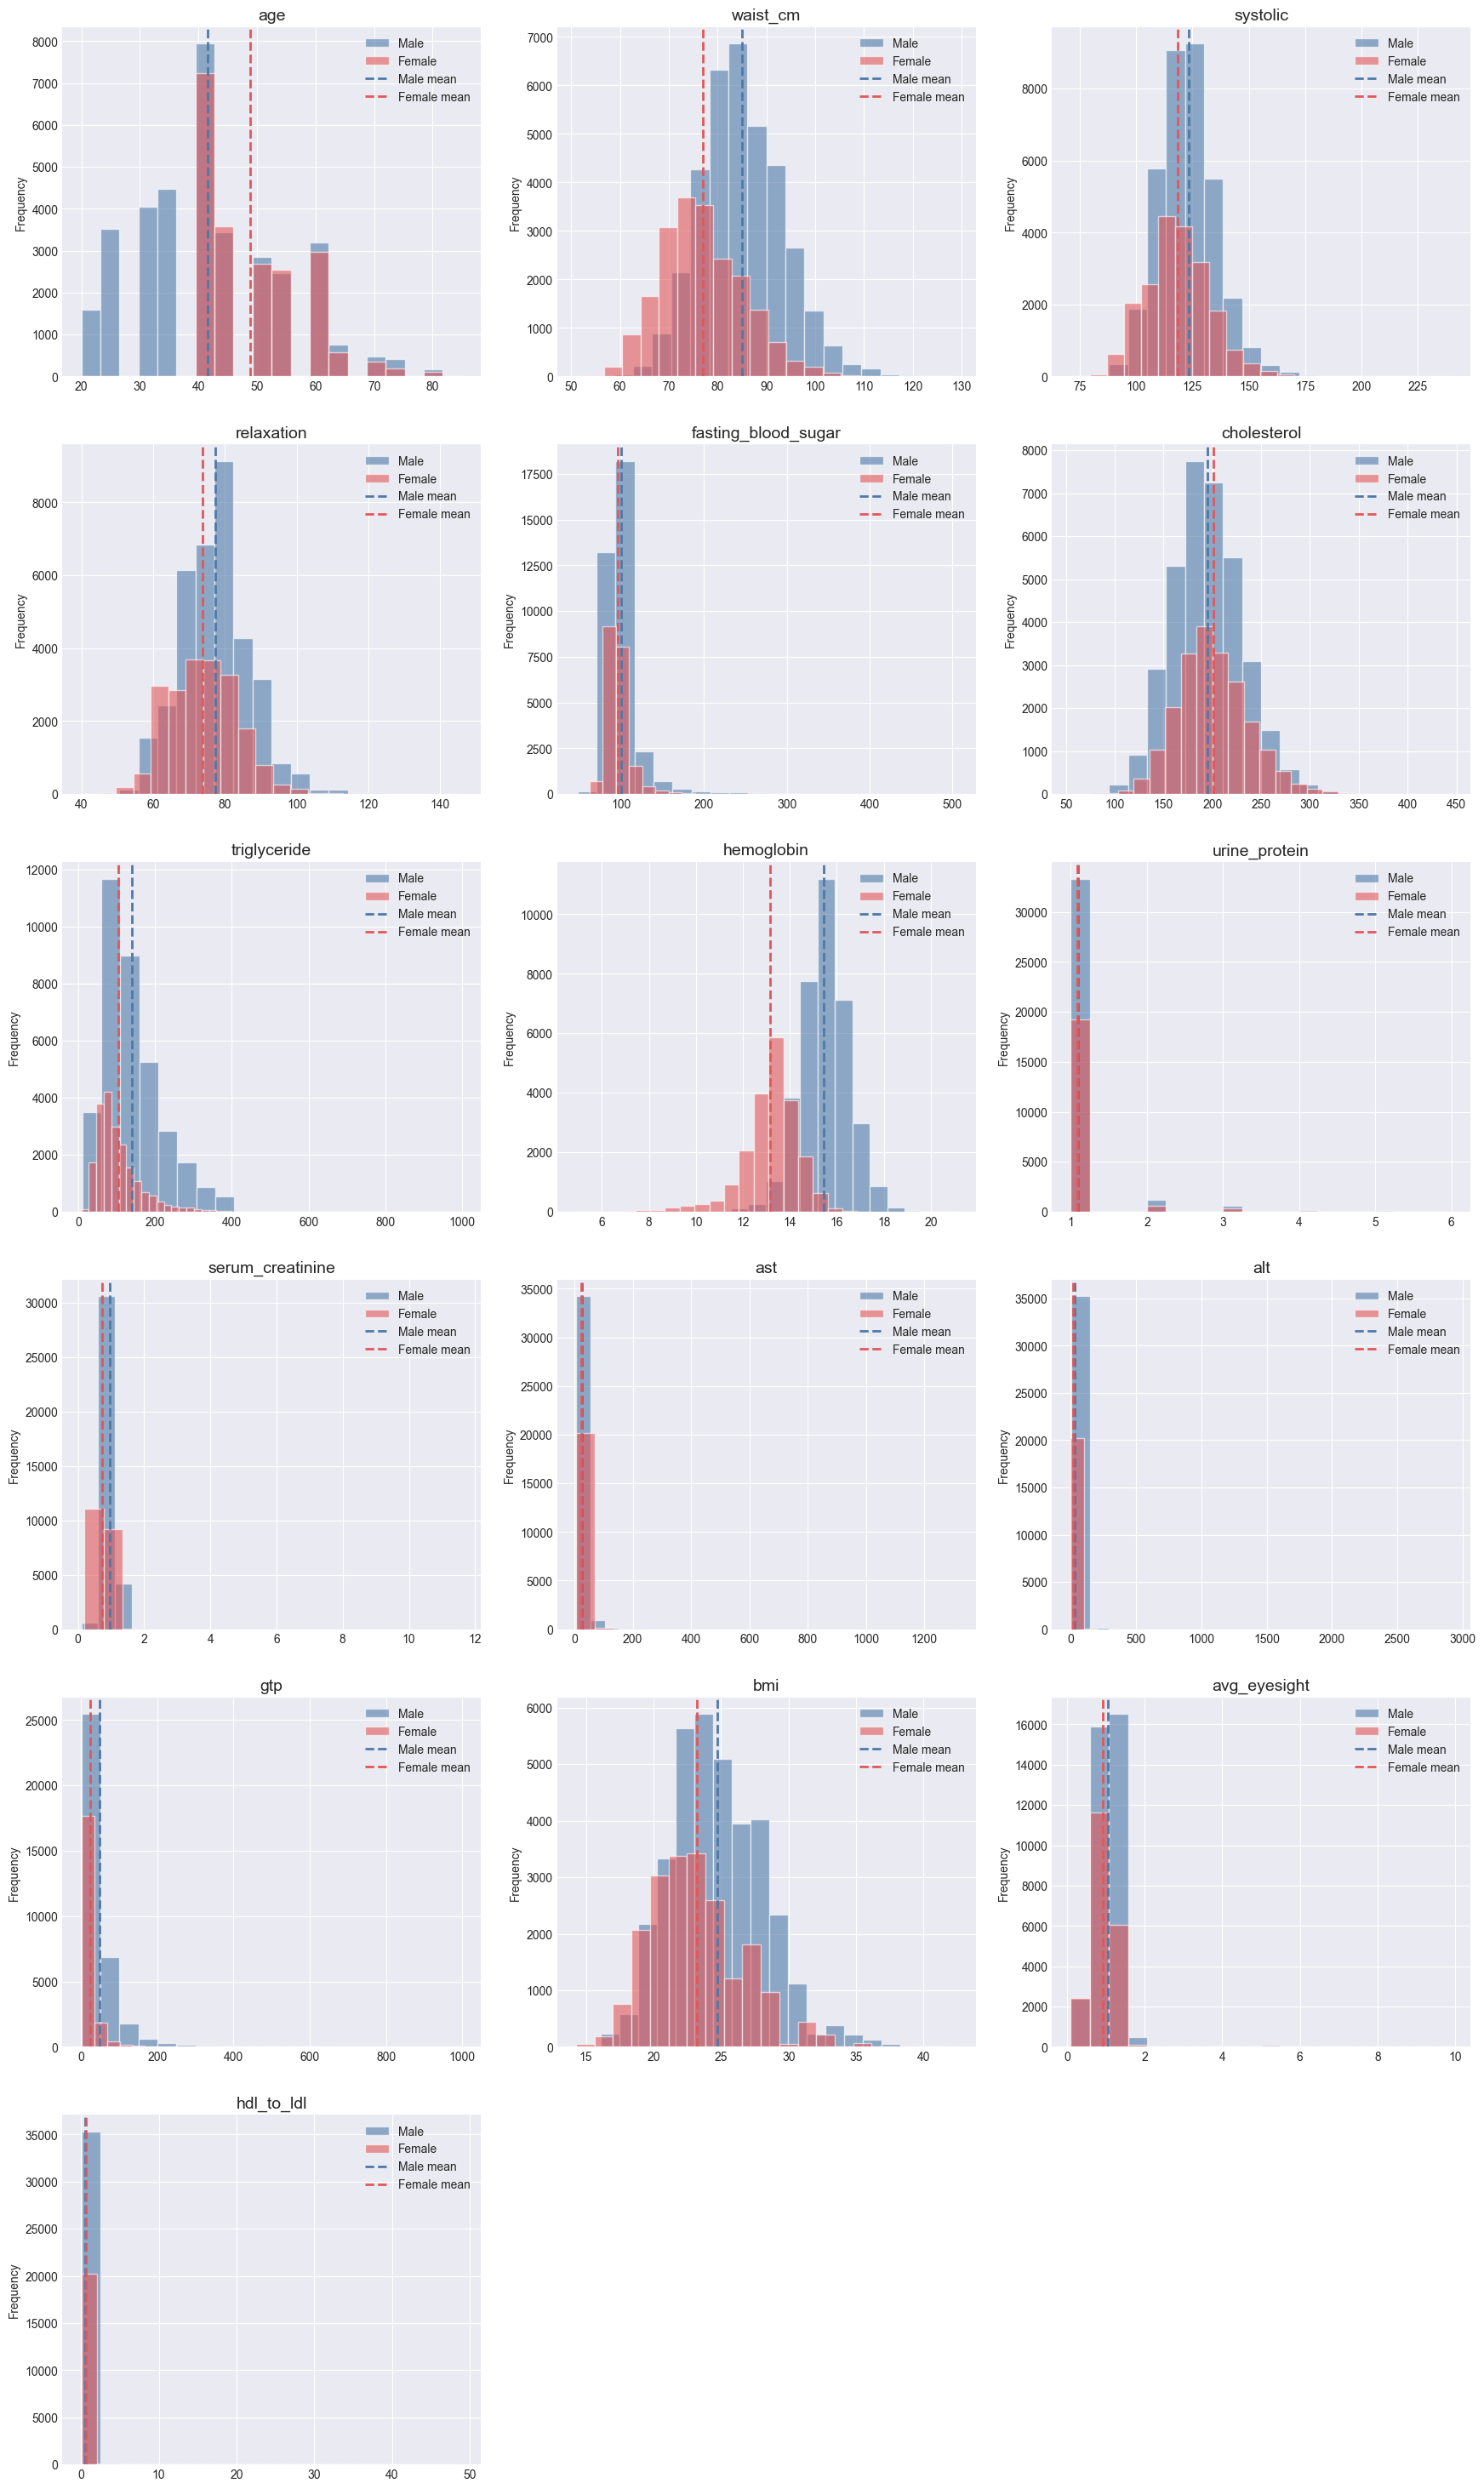

In [112]:
plot_comparison_histogram_style(numeric_cols,male,"Male",female,"Female")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Handling Outliers
    </h4>
</div> 

In [113]:
male_ou = remove_outliers_iqr(male,numeric_cols) 
female_ou = remove_outliers_iqr(female,numeric_cols)

Original shape: (35401, 20)
Without outliers: (21510, 20)
Original shape: (20291, 20)
Without outliers: (12515, 20)


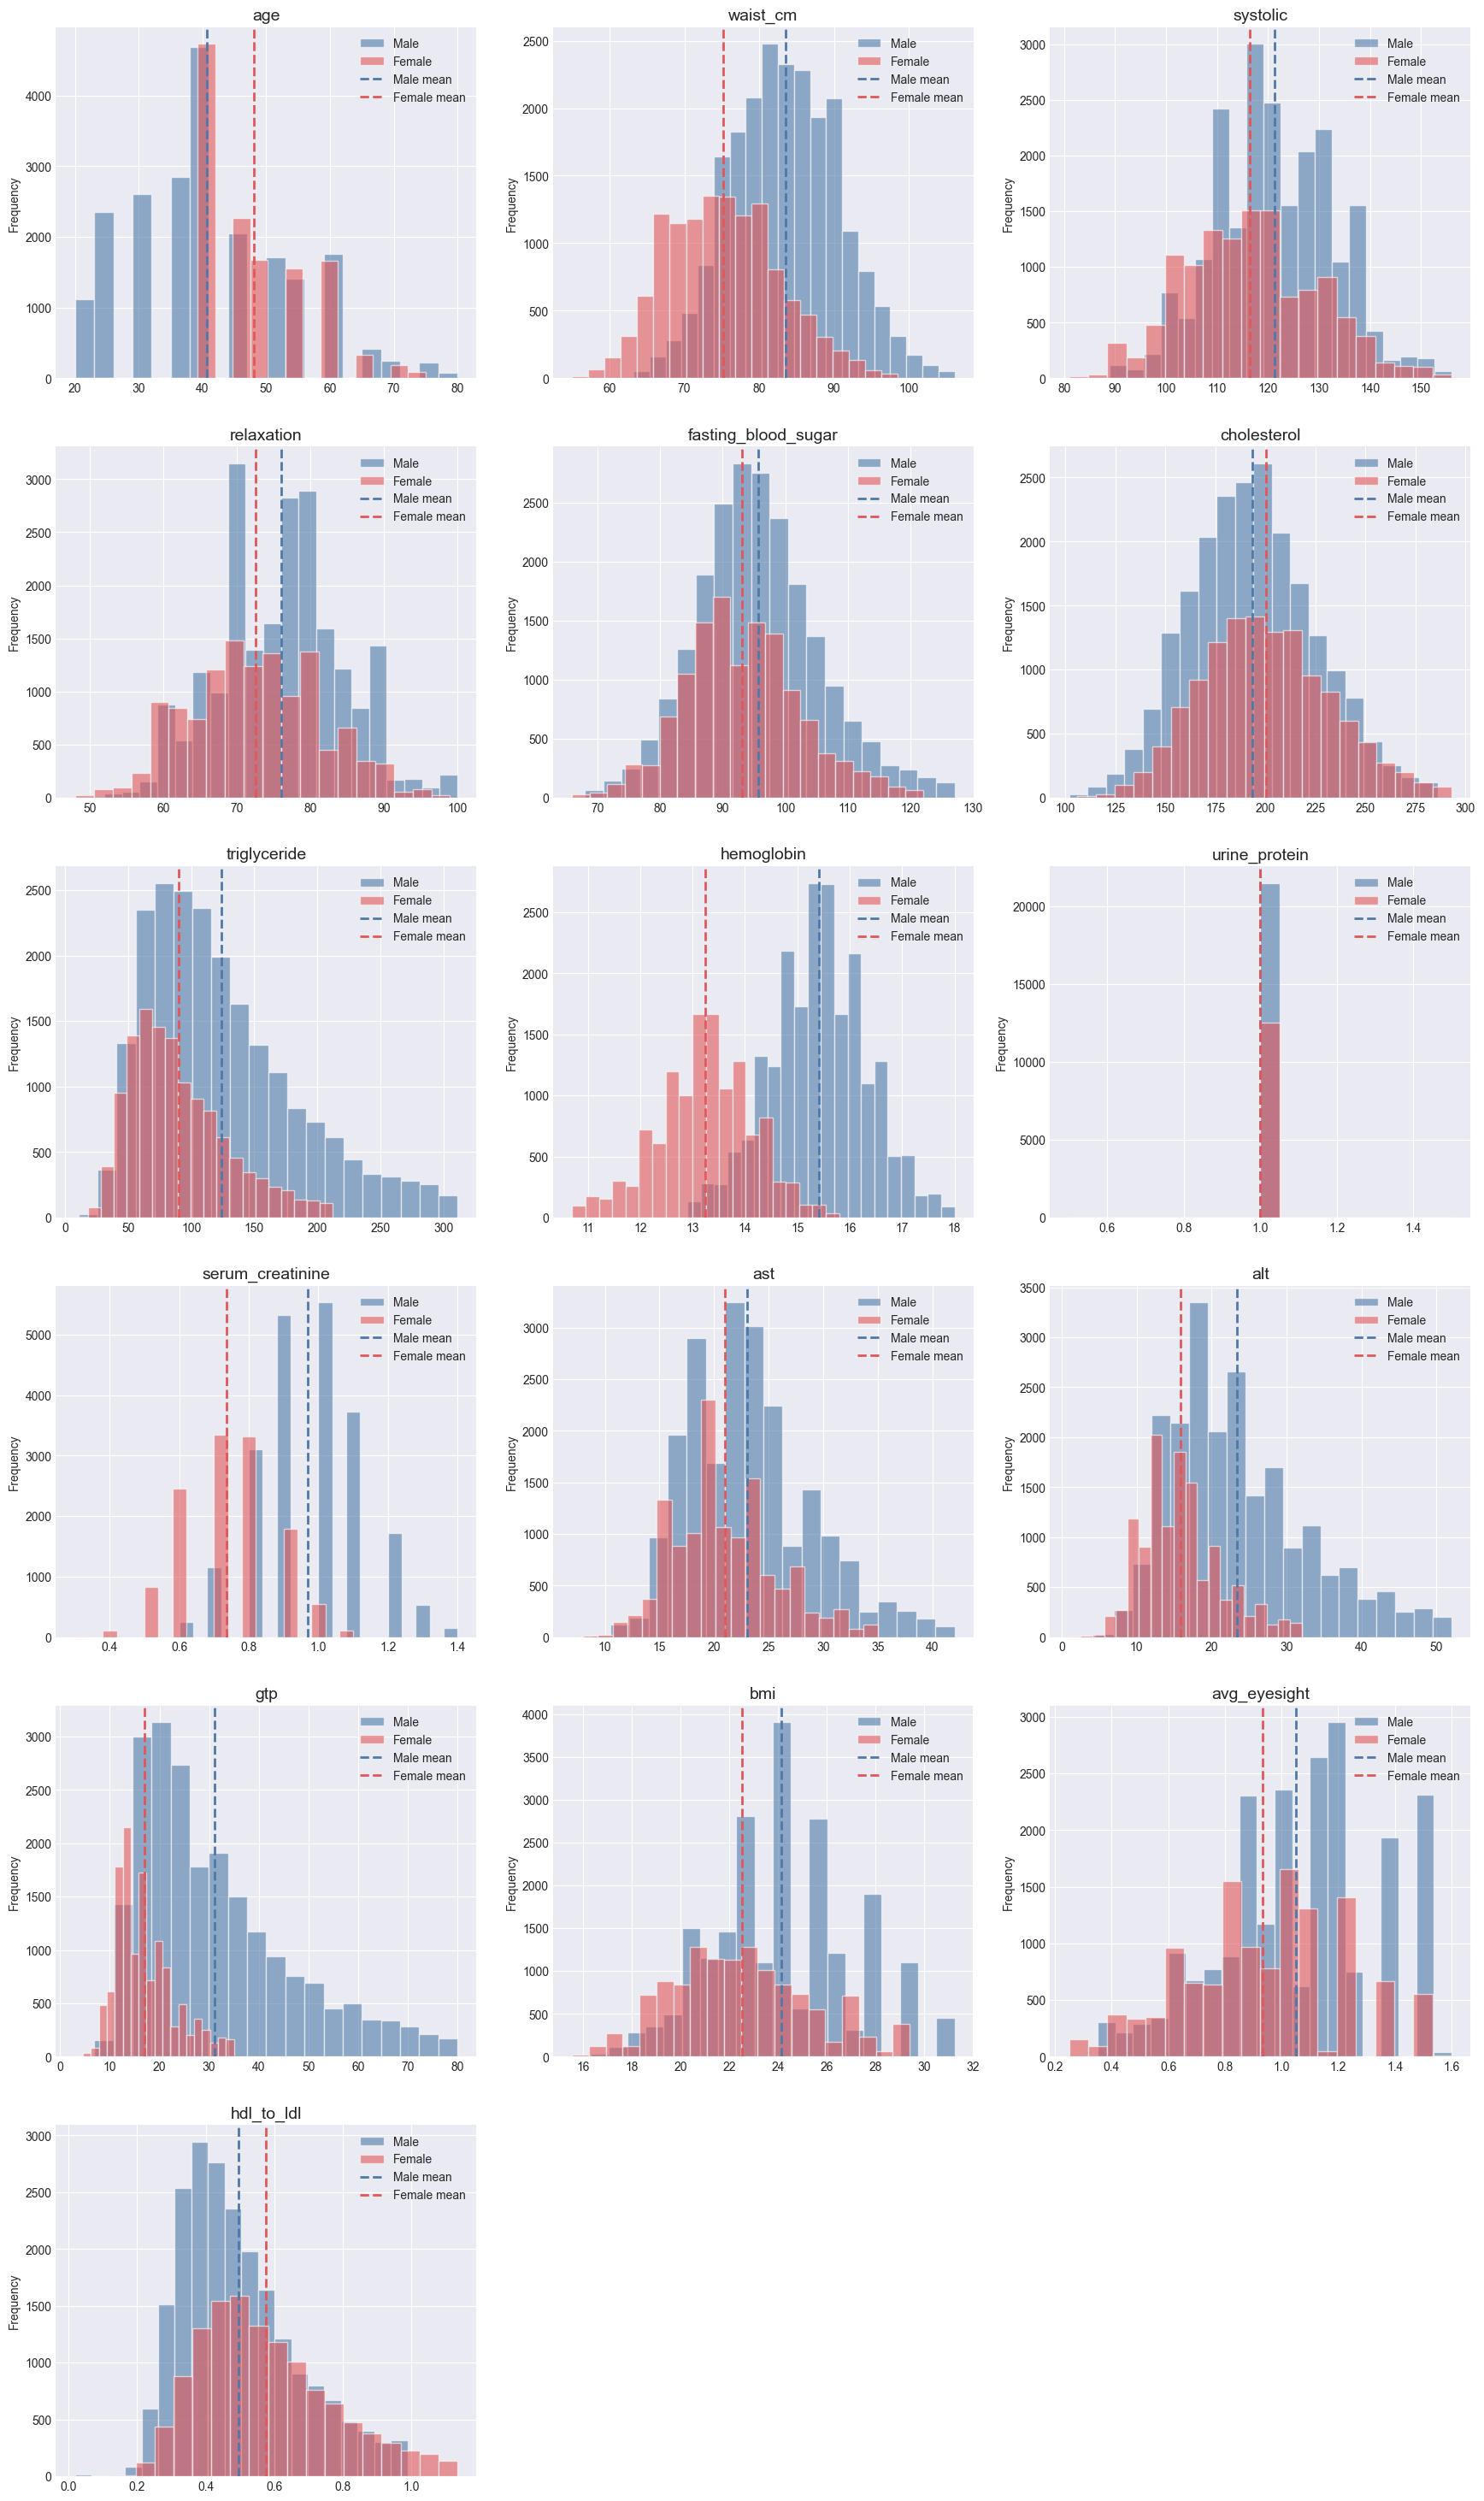

In [114]:
plot_comparison_histogram_style(numeric_cols,male_ou,"Male",female_ou,"Female")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Hypotesis Test
    </h4>
</div> 

In [115]:
hypotesis_test_gender = realizar_ttest(df, "gender", numeric_cols)
hypotesis_test_gender

Variable  Group 0 Mean  Group 1 Mean  T-Statistic   P-Value  \
0                   age       48.8083       41.5317      78.3744  0.000000   
1              waist_cm       76.9068       84.9923    -108.2396  0.000000   
2              systolic      118.4723      123.2263     -38.9768  0.000000   
3            relaxation       73.7305       77.3084     -42.3849  0.000000   
4   fasting_blood_sugar       96.6173      100.8571     -24.9023  0.000000   
5           cholesterol      200.9896      194.5582      20.1351  0.000000   
6          triglyceride      103.8118      139.7650     -62.9917  0.000000   
7            hemoglobin       13.1715       15.4543    -223.5988  0.000000   
8      serum_creatinine        0.7373        0.9708    -147.2868  0.000000   
9                   ast       23.7358       27.5855     -22.8304  0.000000   
10                  alt       20.1726       30.9700     -42.0140  0.000000   
11                  gtp       24.1913       48.9860     -68.8495  0.000000   
12         avg_eyesight        0.9287        1.0566     -37.8418  0.000000   
13                  bmi       23.1835       24.7286     -51.5395  0.000000   
14           hdl_to_ldl        0.5997        0.5384      15.4865  0.000000   
15        urine_protein        1.0787        1.0921      -3.8427  0.000122   

    Cohen_d     Result  
0    0.6579  Reject H0  
1   -0.9567  Reject H0  
2   -0.3478  Reject H0  
3   -0.3744  Reject H0  
4   -0.2117  Reject H0  
5    0.1776  Reject H0  
6   -0.5349  Reject H0  
7   -2.0079  Reject H0  
8   -1.2583  Reject H0  
9   -0.2004  Reject H0  
10  -0.3617  Reject H0  
11  -0.5503  Reject H0  
12  -0.3282  Reject H0  
13  -0.4543  Reject H0  
14   0.1316  Reject H0  
15  -0.0334  Reject H0

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Non-Smoker-Gender-Based Analysis (Male Non-Smoker vs Female Non-Smoker)
    </h4>
</div> 

In [116]:
no_smoking_male = male_ou[male_ou["smoking"] == "No"]
no_smoking_female = female_ou[female_ou["smoking"] == "No"]

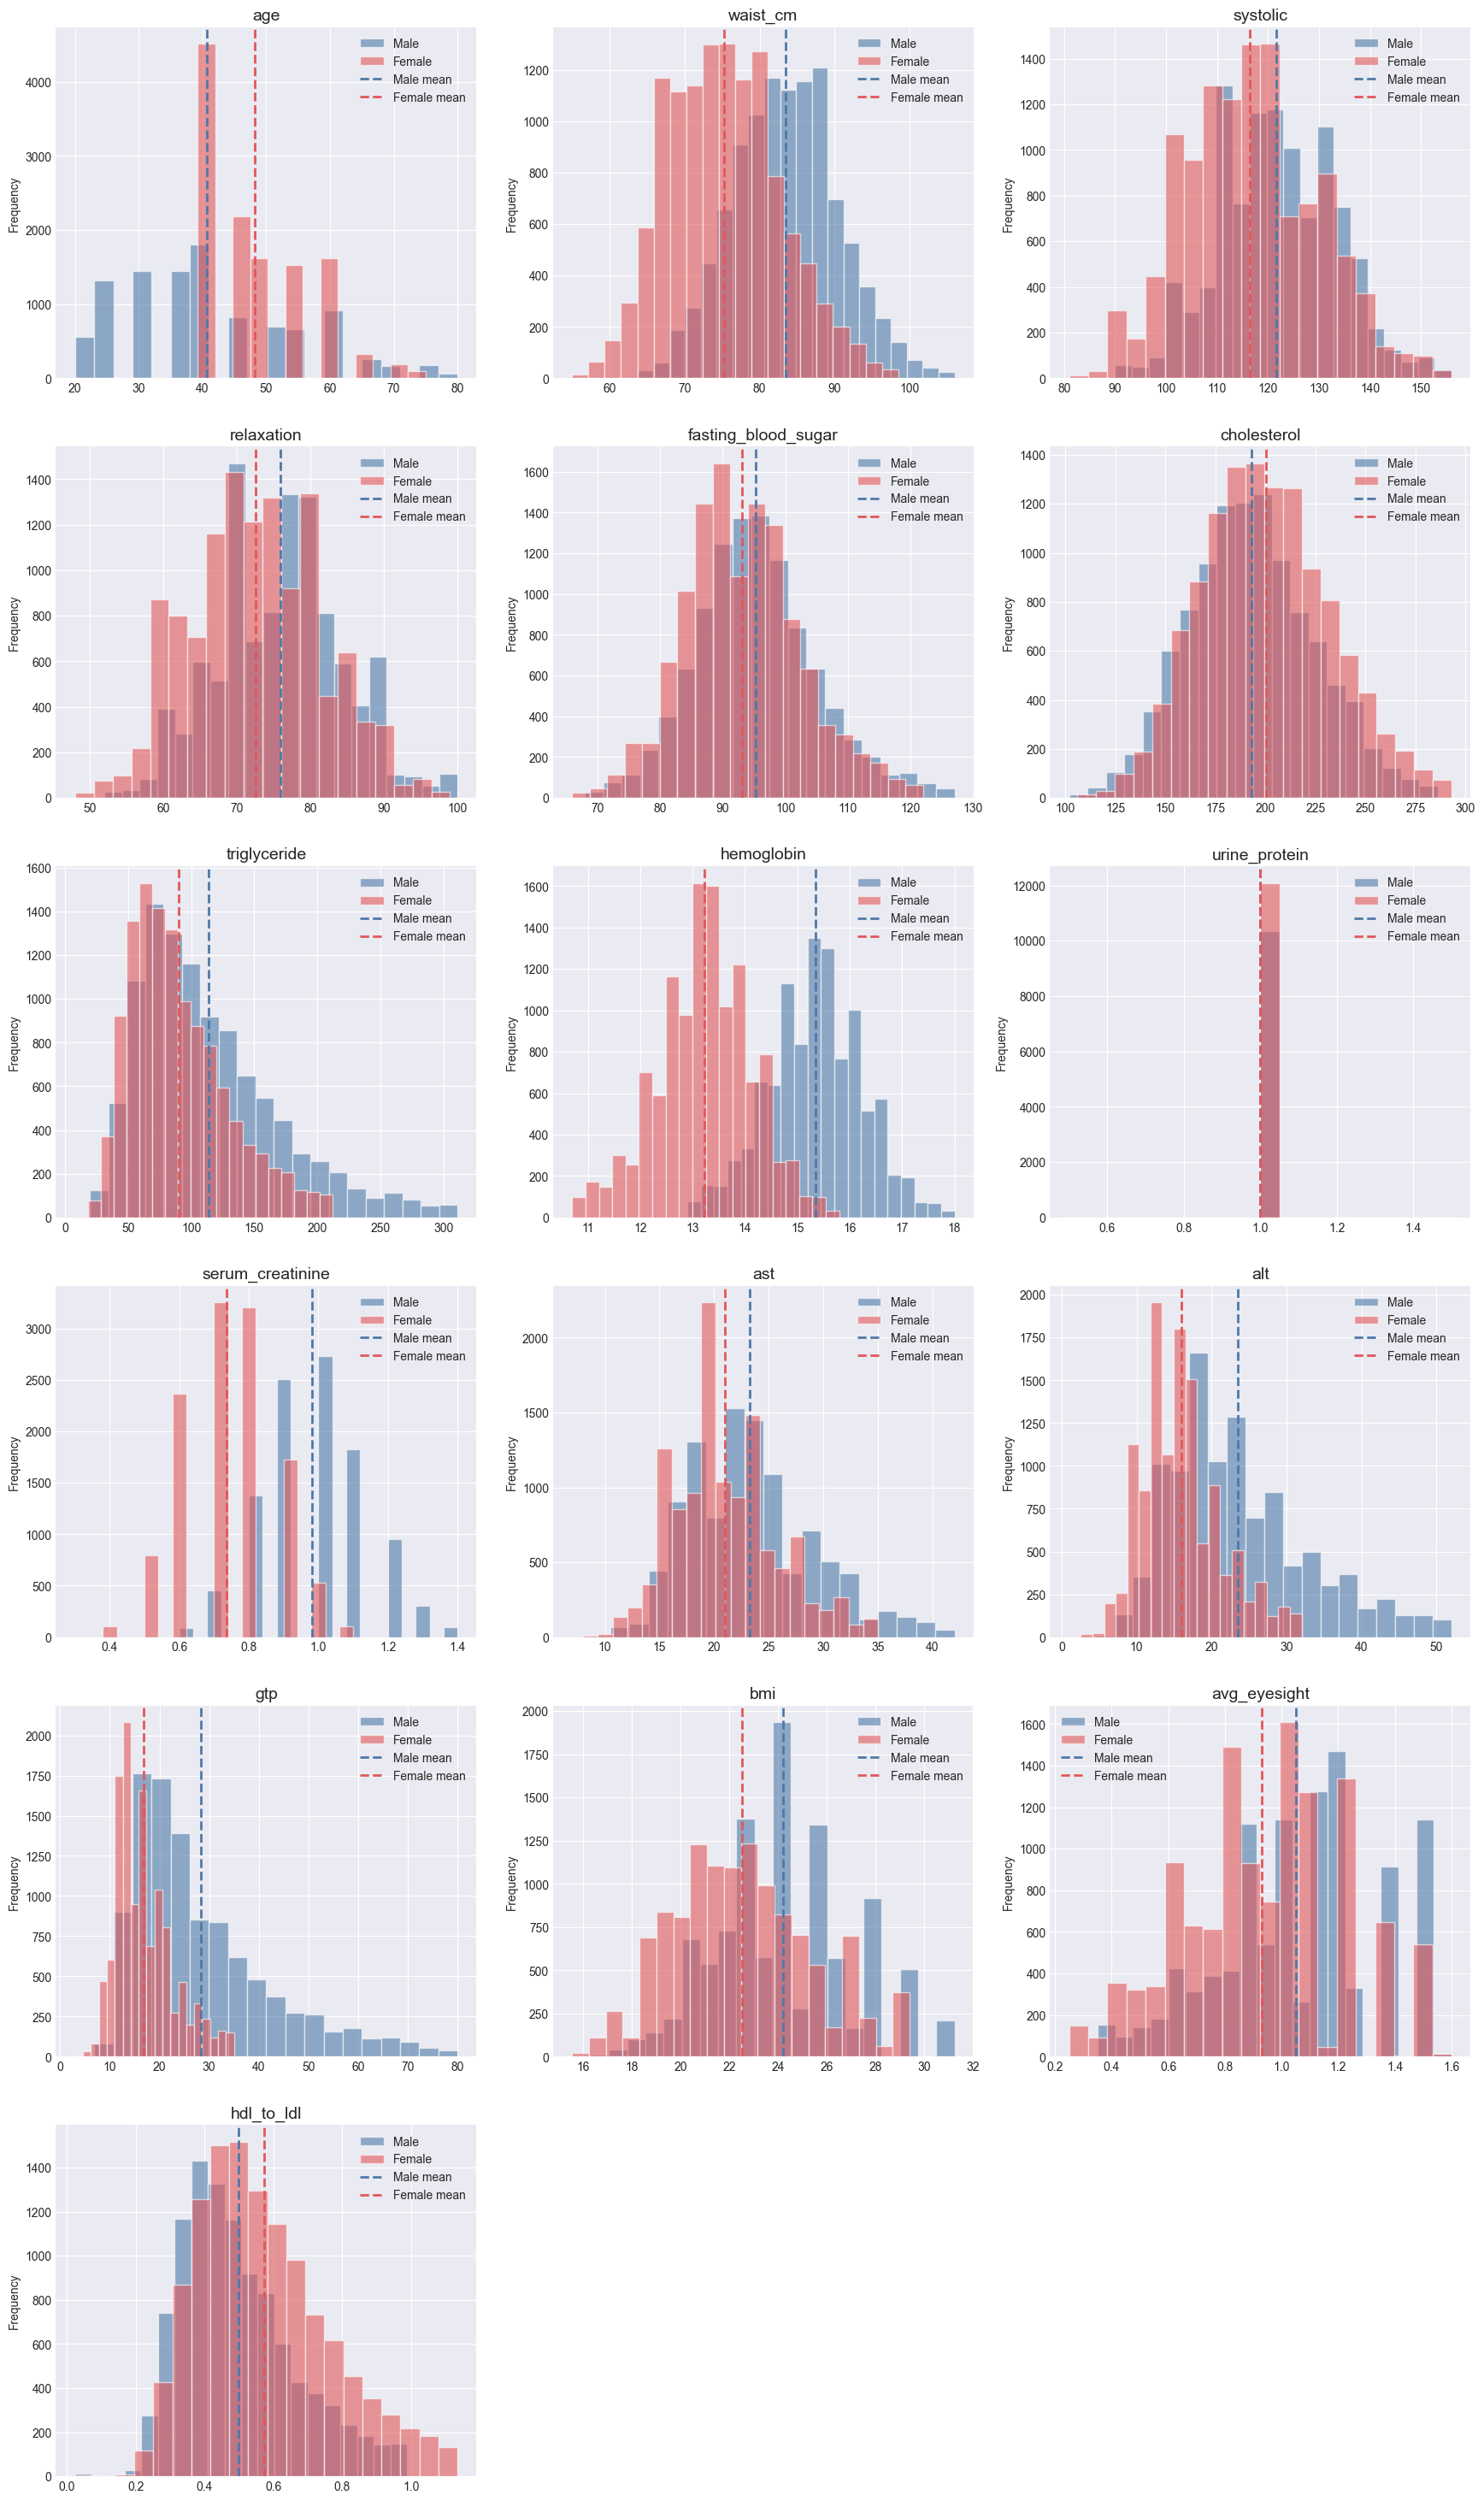

In [117]:
plot_comparison_histogram_style(numeric_cols,no_smoking_male,"Male",no_smoking_female,"Female")

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Hypotesis Test
    </h4>
</div> 

In [118]:
hypotesis_test_gender_no_smoking = realizar_ttest(df[df["smoking"]=="No"], "gender", numeric_cols)
hypotesis_test_gender_no_smoking

Variable  Group 0 Mean  Group 1 Mean  T-Statistic   P-Value  \
0                   age       48.9154       41.6976      55.4975  0.000000   
1              waist_cm       76.8937       84.8172     -89.1699  0.000000   
2              systolic      118.5820      123.3764     -32.9042  0.000000   
3            relaxation       73.7579       76.9866     -31.5749  0.000000   
4   fasting_blood_sugar       96.5036       99.2234     -14.0002  0.000000   
5           cholesterol      201.0754      193.5298      19.6200  0.000000   
6          triglyceride      102.9043      125.2385     -32.7842  0.000000   
7            hemoglobin       13.1585       15.3578    -183.2230  0.000000   
8      serum_creatinine        0.7376        0.9863    -119.3516  0.000000   
9                   ast       23.7483       27.2282     -17.3511  0.000000   
10                  alt       20.1725       30.3577     -29.9370  0.000000   
11                  gtp       23.6826       39.7421     -40.2577  0.000000   
12         avg_eyesight        0.9299        1.0573     -29.2337  0.000000   
13                  bmi       23.1912       24.7320     -43.3729  0.000000   
14           hdl_to_ldl        0.5971        0.5269      19.7193  0.000000   
15        urine_protein        1.0786        1.0879      -2.2123  0.026953   

    Cohen_d     Result  
0    0.6072  Reject H0  
1   -0.9525  Reject H0  
2   -0.3506  Reject H0  
3   -0.3379  Reject H0  
4   -0.1507  Reject H0  
5    0.2099  Reject H0  
6   -0.3544  Reject H0  
7   -1.9455  Reject H0  
8   -1.2953  Reject H0  
9   -0.1854  Reject H0  
10  -0.3243  Reject H0  
11  -0.4422  Reject H0  
12  -0.3157  Reject H0  
13  -0.4635  Reject H0  
14   0.2066  Reject H0  
15  -0.0238  Reject H0

<a id="7"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Dimensionality Reduction
    </h1>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Principal Components Analysis
    </h4>
</div> 

In [119]:
df_dim_reduction = df.copy(deep=True)
df_dim_reduction = df_dim_reduction.drop(columns="urine_protein",axis=1)

cols_dim_reduction = df_dim_reduction.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dim_reduction[cols_dim_reduction])

standardized_df = pd.DataFrame(X_scaled, columns = cols_dim_reduction)
standardized_df.head()

age  waist_cm  systolic  relaxation  fasting_blood_sugar  cholesterol  \
0 -0.346517 -0.080484 -0.547989   -0.310442            -0.255457     0.498616   
1 -0.346517 -0.112832 -0.182381   -0.620386             1.475695    -0.135034   
2  0.896099 -0.220659  1.206928    1.032645            -0.495894     1.242467   
3 -0.346517  0.641955 -1.571690   -1.653530            -0.159282     3.446468   
4 -0.346517  0.426302 -0.109259   -0.207128            -0.928682    -0.355434   

   triglyceride  hemoglobin  serum_creatinine       ast       alt       gtp  \
0     -0.623481   -1.101061         -0.838461 -0.422775 -0.259666 -0.257550   
1     -0.162840   -1.228898         -1.289883 -0.216113 -0.259666 -0.436511   
2      0.772403    0.752585          0.515806 -0.267779 -0.356604 -0.356973   
3      1.777440    0.049478          0.515806 -0.371110 -0.033477 -0.436511   
4     -0.735152   -1.356736         -1.289883 -0.526106 -0.421230 -0.356973   

        bmi  avg_eyesight  hdl_to_ldl  
0  0.232458      0.224745    0.038682  
1 -0.209413     -0.774488   -0.477153  
2 -0.979067     -0.524680   -0.407596  
3  0.444604      1.223979   -0.750143  
4  0.232458     -0.025063    0.038836

In [121]:
corr_matrix = standardized_df.corr()
corr_matrix

age  waist_cm  systolic  relaxation  \
age                  1.000000 -0.026297  0.134023    0.050745   
waist_cm            -0.026297  1.000000  0.316922    0.292627   
systolic             0.134023  0.316922  1.000000    0.761051   
relaxation           0.050745  0.292627  0.761051    1.000000   
fasting_blood_sugar  0.182351  0.211132  0.172700    0.147879   
cholesterol          0.055557  0.065467  0.059572    0.095357   
triglyceride         0.015102  0.361922  0.198826    0.215541   
hemoglobin          -0.263078  0.387066  0.186514    0.232899   
serum_creatinine    -0.106118  0.235024  0.072288    0.085033   
ast                  0.032576  0.142690  0.083204    0.085151   
alt                 -0.063937  0.252478  0.094893    0.106648   
gtp                  0.013031  0.243141  0.165724    0.177648   
bmi                 -0.063384  0.819226  0.299640    0.280662   
avg_eyesight        -0.235850  0.039761 -0.020083    0.010055   
hdl_to_ldl          -0.003352 -0.134502 -0.014021   -0.030611   

                     fasting_blood_sugar  cholesterol  triglyceride  \
age                             0.182351     0.055557      0.015102   
waist_cm                        0.211132     0.065467      0.361922   
systolic                        0.172700     0.059572      0.198826   
relaxation                      0.147879     0.095357      0.215541   
fasting_blood_sugar             1.000000     0.009903      0.227746   
cholesterol                     0.009903     1.000000      0.247581   
triglyceride                    0.227746     0.247581      1.000000   
hemoglobin                      0.099921     0.061503      0.273353   
serum_creatinine                0.041341    -0.000129      0.124986   
ast                             0.068772     0.026594      0.101696   
alt                             0.087616     0.050676      0.175164   
gtp                             0.182414     0.083531      0.301876   
bmi                             0.171535     0.094269      0.316197   
avg_eyesight                   -0.052161    -0.007797      0.024057   
hdl_to_ldl                     -0.007076    -0.293643     -0.102021   

                     hemoglobin  serum_creatinine       ast       alt  \
age                   -0.263078         -0.106118  0.032576 -0.063937   
waist_cm               0.387066          0.235024  0.142690  0.252478   
systolic               0.186514          0.072288  0.083204  0.094893   
relaxation             0.232899          0.085033  0.085151  0.106648   
fasting_blood_sugar    0.099921          0.041341  0.068772  0.087616   
cholesterol            0.061503         -0.000129  0.026594  0.050676   
triglyceride           0.273353          0.124986  0.101696  0.175164   
hemoglobin             1.000000          0.371382  0.120575  0.202025   
serum_creatinine       0.371382          1.000000  0.048548  0.083602   
ast                    0.120575          0.048548  1.000000  0.740726   
alt                    0.202025          0.083602  0.740726  1.000000   
gtp                    0.223844          0.102411  0.379959  0.343934   
bmi                    0.254233          0.146603  0.126383  0.233755   
avg_eyesight           0.116256          0.072323 -0.009045  0.026431   
hdl_to_ldl            -0.087317         -0.048731  0.009621 -0.036336   

                          gtp       bmi  avg_eyesight  hdl_to_ldl  
age                  0.013031 -0.063384     -0.235850   -0.003352  
waist_cm             0.243141  0.819226      0.039761   -0.134502  
systolic             0.165724  0.299640     -0.020083   -0.014021  
relaxation           0.177648  0.280662      0.010055   -0.030611  
fasting_blood_sugar  0.182414  0.171535     -0.052161   -0.007076  
cholesterol          0.083531  0.094269     -0.007797   -0.293643  
triglyceride         0.301876  0.316197      0.024057   -0.102021  
hemoglobin           0.223844  0.254233      0.116256   -0.087317  
serum_creatinine     0.102411  0.146603      0.072323   -0.048731  

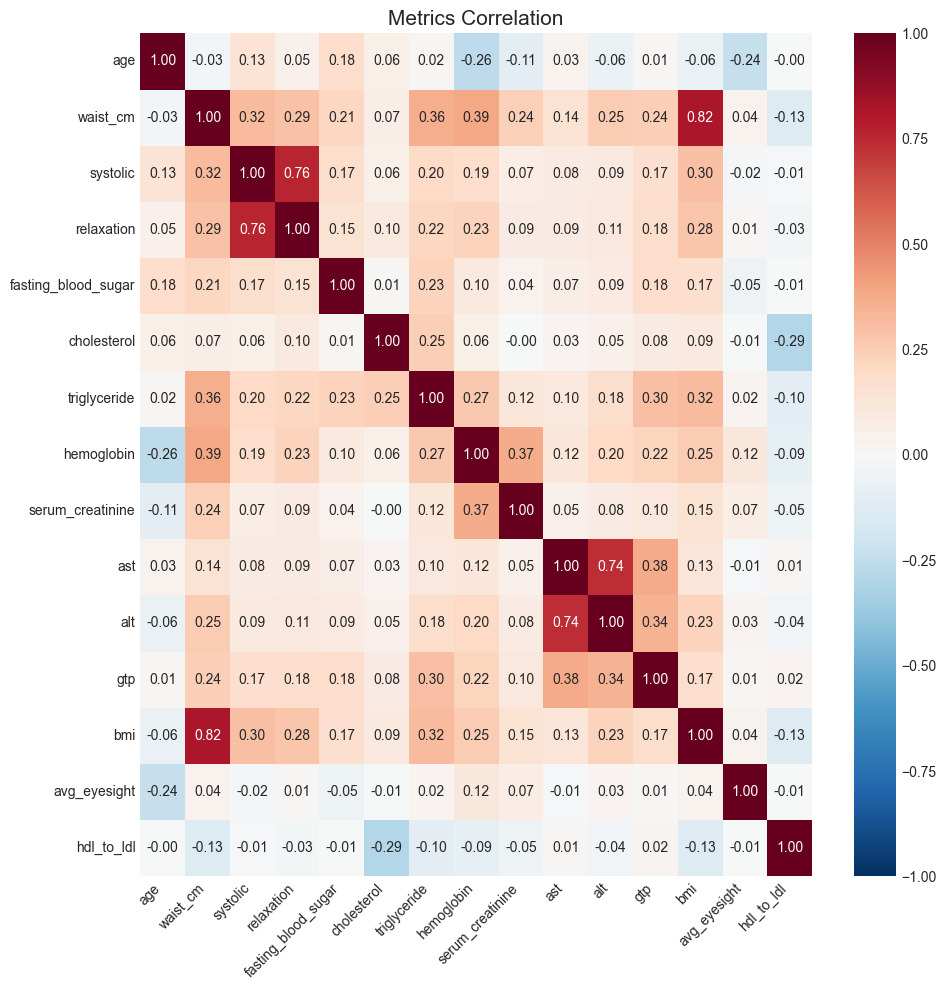

In [122]:
plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", vmin=-1, vmax=1,fmt=".2f")

plt.title("Metrics Correlation", fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [123]:
pca = PCA()
pca.fit(corr_matrix)

summary = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Varianza explicada": np.round(pca.explained_variance_ratio_, 4),
    "Varianza acumulada": np.round(np.cumsum(pca.explained_variance_ratio_),4)
})

print(summary)

   Componente  Varianza explicada  Varianza acumulada
0         PC1              0.2651              0.2651
1         PC2              0.1783              0.4434
2         PC3              0.1451              0.5886
3         PC4              0.1067              0.6953
4         PC5              0.0788              0.7741
5         PC6              0.0598              0.8339
6         PC7              0.0504              0.8843
7         PC8              0.0407              0.9251
8         PC9              0.0272              0.9523
9        PC10              0.0213              0.9736
10       PC11              0.0176              0.9912
11       PC12              0.0036              0.9948
12       PC13              0.0034              0.9982
13       PC14              0.0018              1.0000
14       PC15              0.0000              1.0000


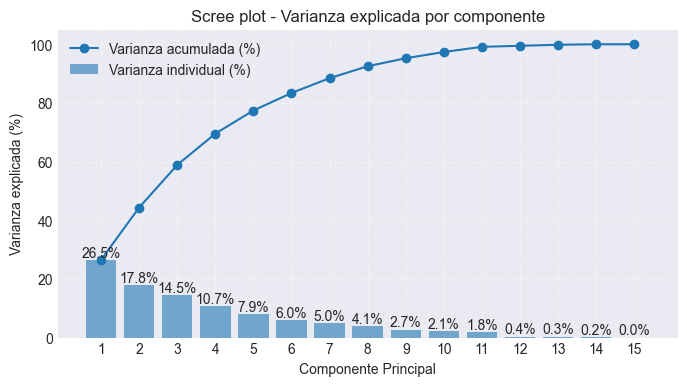

In [124]:
explained_var = pca.explained_variance_ratio_ * 100
plt.figure(figsize=(8,4))
n_comp = len(pca.explained_variance_ratio_)

plt.plot(range(1, n_comp+1), np.cumsum(pca.explained_variance_ratio_)*100, marker='o', label='Varianza acumulada (%)')

plt.bar(range(1, n_comp+1), pca.explained_variance_ratio_*100, alpha=0.6, label='Varianza individual (%)')

plt.xlabel('Componente Principal')
plt.ylabel('Varianza explicada (%)')

plt.title('Scree plot - Varianza explicada por componente')
plt.xticks(range(1, n_comp+1))
plt.legend()

plt.grid(True, linestyle='--', alpha=0.4)
for i, v in enumerate(explained_var):
    plt.text(i + 1, v + 1, f"{v:.1f}%", ha='center')

plt.show()

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    UMAP
    </h4>
</div> 

In [125]:
import umap

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)


c:\Users\jeroh\OneDrive\Documentos\PredictiveAnalytics-Projects\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


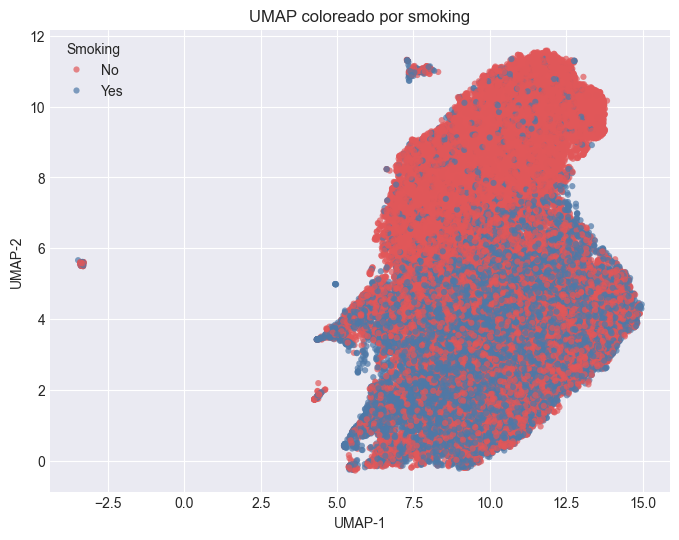

In [126]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x = X_umap[:, 0], 
    y = X_umap[:, 1], 
    hue = df_dim_reduction["smoking"],  
    palette = [colors_palette["coral"],colors_palette["steel_blue"]],
    s=20,
    alpha=0.7,
    edgecolor='none'
)

plt.title("UMAP coloreado por smoking")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Smoking") 
plt.show()

<a id="8"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Preprocessing For Classification
    </h1>
</div> 

In [127]:
df_train = df.copy(deep=True)
df_train = df_train.drop(columns="urine_protein",axis=1)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
onehot_cols = ["gender"]
label_cols = ["dental_caries", "tartar"]

y = df_train["smoking"]
X = df_train.drop(columns=["smoking"])

le = LabelEncoder()
y = le.fit_transform(y)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("gender_ohe", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
        ("label_enc", OrdinalEncoder(), label_cols)
    ],
    remainder="drop"
)

X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gender_test = X_test_df["gender"].values

X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")

feature_names = preprocessor.get_feature_names_out()
print(feature_names)


Train: (44553, 19), (44553,)
Test:  (11139, 19), (11139,)
['num__age' 'num__waist_cm' 'num__systolic' 'num__relaxation'
 'num__fasting_blood_sugar' 'num__cholesterol' 'num__triglyceride'
 'num__hemoglobin' 'num__serum_creatinine' 'num__ast' 'num__alt'
 'num__gtp' 'num__bmi' 'num__avg_eyesight' 'num__hdl_to_ldl'
 'gender_ohe__gender_Female' 'gender_ohe__gender_Male'
 'label_enc__dental_caries' 'label_enc__tartar']


<a id="9"></a>
<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Classification Models
    </h1>
</div> 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": SVC(C=100, gamma=0.002),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

best_accuracy = 0
best_model = None
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds) 
    results[name] = {
        "Accuracy": round(acc * 100, 2),
        "Confusion Matrix": confusion_matrix(y_test, preds),
        "Report": classification_report(y_test, preds)
    }


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

    print(f"Modelo: {name} - Accuracy: {results[name]['Accuracy']}%")

print(f"\nEl mejor modelo es: {best_model_name} con {round(best_accuracy*100, 2)}%")

Modelo: Logistic Regression - Accuracy: 74.16%
Modelo: Gaussian NB - Accuracy: 70.33%
Modelo: Bernoulli NB - Accuracy: 70.99%


In [ ]:

reducer_test = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.1, 
    n_components=2, 
    random_state=42
)

X_umap_test = reducer_test.fit_transform(X_test)

y_pred_test = best_model.predict(X_test)



c:\Users\jeroh\OneDrive\Documentos\PredictiveAnalytics-Projects\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


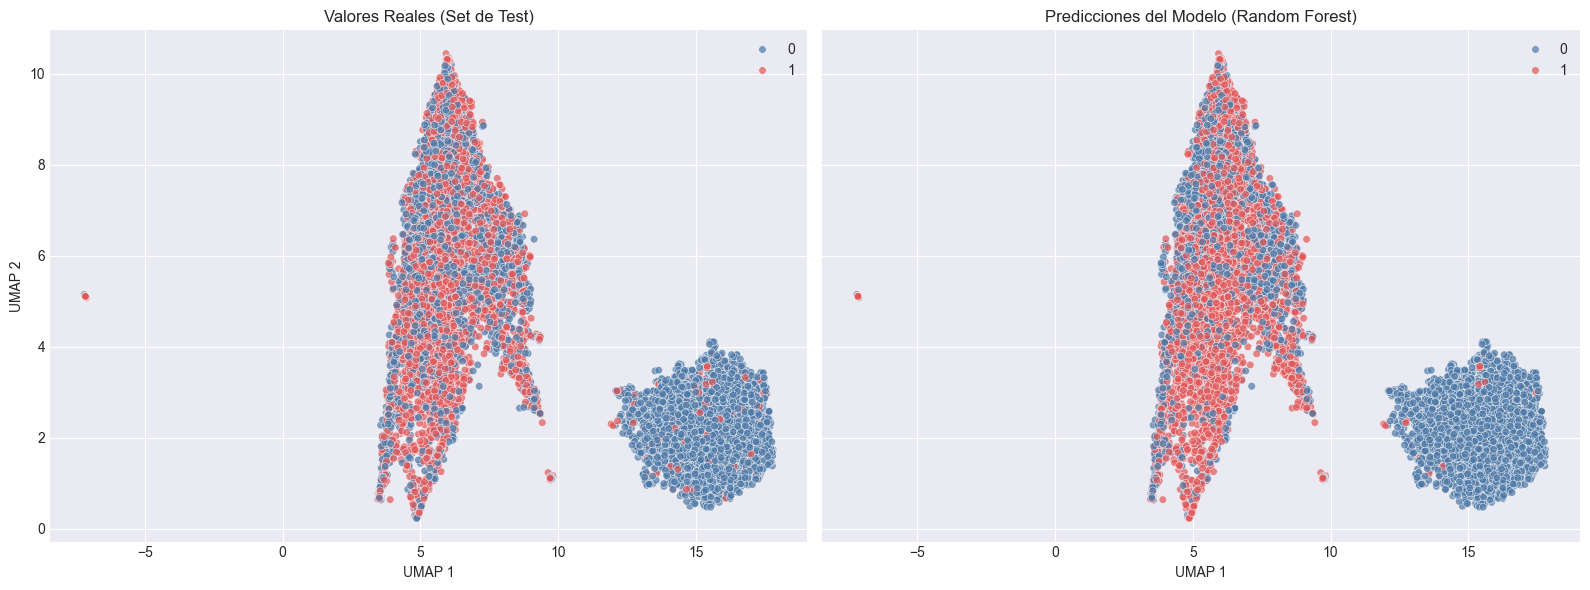

In [ ]:
colors = [colors_palette["steel_blue"], colors_palette["coral"]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_test, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[0]
)
axes[0].set_title("Valores Reales (Set de Test)")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_pred_test, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[1]
)
axes[1].set_title(f"Predicciones del Modelo ({best_model_name})")
axes[1].set_xlabel("UMAP 1")

plt.tight_layout()
plt.show()

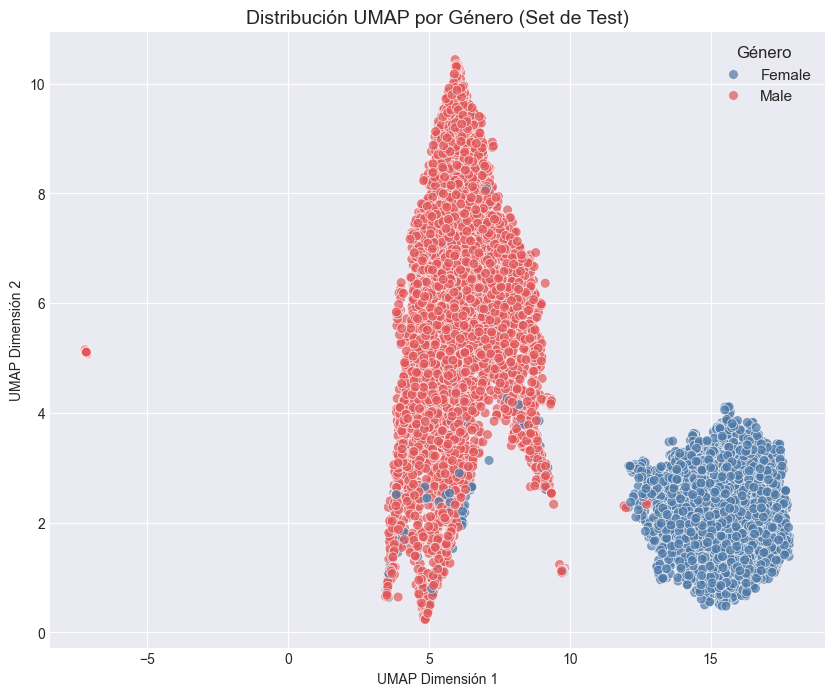

In [ ]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_umap_test[:, 0],
    y=X_umap_test[:, 1],
    hue=gender_test, 
    palette=colors,   
    s=50,            
    alpha=0.7        
)


plt.title("Distribución UMAP por Género (Set de Test)", fontsize=14)
plt.xlabel("UMAP Dimensión 1")
plt.ylabel("UMAP Dimensión 2")

plt.legend(title="Género", title_fontsize='12', fontsize='11')

plt.show()

In [ ]:

mask_train_male = X_train_df['gender'] == 'Male'
mask_test_male = X_test_df['gender'] == 'Male'


X_train_male_df = X_train_df[mask_train_male]
X_test_male_df = X_test_df[mask_test_male]


y_train_male = y_train[mask_train_male]
y_test_male = y_test[mask_test_male]

In [ ]:

num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
label_cols = ["dental_caries", "tartar"]


preprocessor_male = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        ("label_enc", OrdinalEncoder(), label_cols)
    ],
    remainder="drop"
)

X_train_male = preprocessor_male.fit_transform(X_train_male_df)
X_test_male = preprocessor_male.transform(X_test_male_df)

print(f"Nuevo set Hombres - Train: {X_train_male.shape}, Test: {X_test_male.shape}")

Nuevo set Hombres - Train: (28326, 17), Test: (7075, 17)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "SVM": SVC(C=100, gamma=0.002),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42
    )
}

results = {}

best_accuracy = 0
best_model = None
best_model_name = ""

for name, model in models.items():
    model.fit(X_train_male, y_train_male)
    preds = model.predict(X_test_male)
    
    acc = accuracy_score(y_test_male, preds) 
    results[name] = {
        "Accuracy": round(acc * 100, 2),
        "Confusion Matrix": confusion_matrix(y_test_male, preds),
        "Report": classification_report(y_test_male, preds)
    }


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

    print(f"Modelo: {name} - Accuracy: {results[name]['Accuracy']}%")

print(f"\nEl mejor modelo es: {best_model_name} con {round(best_accuracy*100, 2)}%")

Modelo: Logistic Regression - Accuracy: 62.05%
Modelo: Gaussian NB - Accuracy: 54.61%
Modelo: Bernoulli NB - Accuracy: 59.48%
Modelo: SVM - Accuracy: 63.84%
Modelo: Random Forest - Accuracy: 75.65%
Modelo: KNN - Accuracy: 61.23%
Modelo: XGBoost - Accuracy: 68.59%

El mejor modelo es: Random Forest con 75.65%


In [ ]:

reducer_test = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.1, 
    n_components=2, 
    random_state=42
)

X_umap_test = reducer_test.fit_transform(X_test_male)

y_pred_test = best_model.predict(X_test_male)

c:\Users\jeroh\OneDrive\Documentos\PredictiveAnalytics-Projects\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


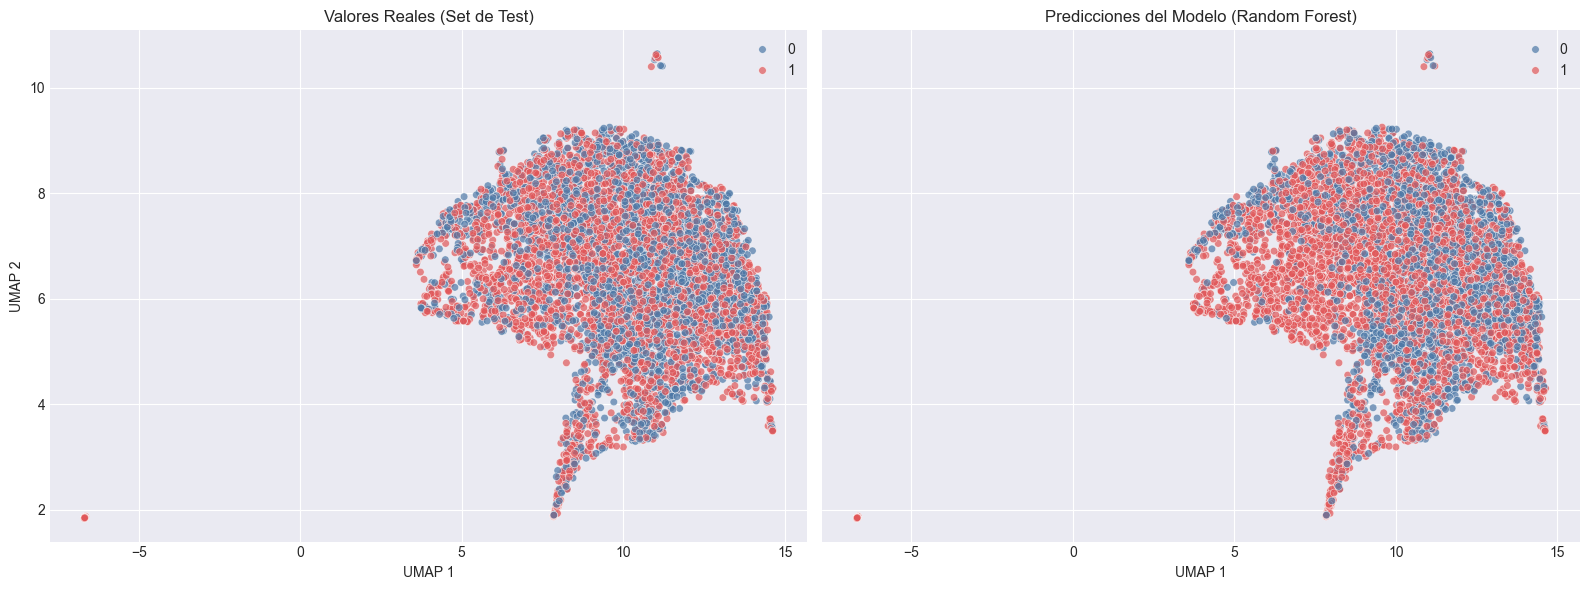

In [ ]:
colors = [colors_palette["steel_blue"], colors_palette["coral"]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_test_male, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[0]
)
axes[0].set_title("Valores Reales (Set de Test)")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")


sns.scatterplot(
    x=X_umap_test[:, 0], 
    y=X_umap_test[:, 1],
    hue=y_pred_test, 
    palette=colors, 
    s=30, alpha=0.7, ax=axes[1]
)
axes[1].set_title(f"Predicciones del Modelo ({best_model_name})")
axes[1].set_xlabel("UMAP 1")

plt.tight_layout()
plt.show()

<a id="10"></a>
<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Summary</h1>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Data Preprocessing
    </h4>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Exploratory Data Analysis (EDA)
    </h4>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Dimensionality Reduction
    </h4>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Preprocessing For Classification
    </h4>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Preprocessing For Classification
    </h4>
</div> 

<div style="background-color:#5f9ade; color:white; padding:15px; border-radius:6px;">
    <h4 style="margin:0px">
    Classification Models
    </h4>
</div> 

<div style="background-color:#4e79a7; color:white; padding:15px; border-radius:6px;text-align: center">
    <h1 style="margin:0px">
    Thank You
    </h1>
</div> 

### Contact Information

**Name:** Jerónimo Hoyos Botero

**Connect on LinkedIn:** https://www.linkedin.com/in/yourprofile 
 
**Explore Github:** https://github.com/yourusername  

---

### References

- https://www.kaggle.com/code/eisgandar/oversampling-methods-on-unbalanced-datasets
- https://www.kaggle.com/code/eisgandar/smoking-signal-of-body-classification#6-%7C-DATASET-PREPROCESSING
- https://www.kaggle.com/code/bugraorhan/how-your-body-reacts-to-smoking#📊-Step-3:-Exploratory-Data-Analysis-(EDA)
- https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4
- https://www.kaggle.com/code/gcmadhan/water-quality-prediction-76-h2o-80-accuracy
- https://www.kaggle.com/code/gcmadhan/hear-attack-eda-prediction-with-recall-90#Hypothesis-Testing
- https://github.com/JensBender/loan-default-prediction